# Business Analysis

## Table of Contents

* [Project Description](#description)
* [Step 1. Open the data file and study the general information](#step_1)
    * [Conclusion](#conclusion_1)
* [Step 2. Data Processing](#step_2)
    * [Processing `visits` dataset](#step_2_1)
    * [Processing `orders` dataset](#step_2_2)
    * [Processing `costs` dataset](#step_2_3)
    * [Conclusion](#conclusion_2)
* [Step 3. Data Analysis](#step_3)
    * [Visits: Evaluating `visits` dataset](#step_3_1)
    * [Sales: Evaluating `orders` dataset](#step_3_2)
    * [Marketing: Evaluating `costs` dataset](#step_3_3)
    * [Conclusion](#conclusion_3)
* [Step 4. General Conclusion](#step_4)

## Project Description<a class="anchor" id="description"></a>

We will analyze the data of user visits, customer orders, and costs data of Yandex.Afisha from June 2017 to May 2018 and optimize the marketing expenses. We will also try to answer other questions such as the following:
* How people use the product
* When they start to buy
* How much money each customer brings
* When they pay off


## Step 1: Open the data file and study the general information<a class="anchor" id="step_1"></a>

In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import matplotlib.patches as mpatches


The following code is for printing out statistical summaries, number of duplicates, number of missing values,
and unique values of every columns in the dataset.

In [3]:
def print_df_info(df):
    '''
    Print out the statistical summaries, number of duplicates, number of missing values,
    and unique values of every columns in the dataset.
    '''
    
    print("DATAFRAME INFO")
    print("----------------------------------------------------------------------")
    print(df.info(memory_usage='deep'))
    print("----------------------------------------------------------------------")
    print()
    print('DATAFRAME STATISTICAL INFO')
    print("----------------------------------------------------------------------")
    print(df.describe(include='all'))
    print("----------------------------------------------------------------------")
    print()
    print('DATAFRAME MISSING VALUES AND DUPLICATED COLUMNS COUNTS')
    print("----------------------------------------------------------------------")
    print('Number of duplicate columns: {}'.format(df.duplicated().sum()))
    print('Number of missing values: \n{}'.format(df.isna().sum()))
    print()

    for col in df.columns:
        print('Column {} Value Counts'.format(col.upper()))
        print("----------------------------------------------------------------------")
        print(df[col].value_counts())
        print("----------------------------------------------------------------------")
        print()

Loading the datasets for the project,

In [4]:
# Loading the datasets
try:
    visits = pd.read_csv('/Users/w.persadha/Documents/Practicum100/07_business_analysis/datasets/visits_log_us.csv')
    orders = pd.read_csv('/Users/w.persadha/Documents/Practicum100/07_business_analysis/datasets/orders_log_us.csv')
    costs = pd.read_csv('/Users/w.persadha/Documents/Practicum100/07_business_analysis/datasets/costs_us.csv')
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv')
    orders = pd.read_csv('/datasets/orders_log_us.csv')
    costs = pd.read_csv('/datasets/costs_us.csv')

Studying the datasets by looking at the head, tails and other general information,

In [5]:
# Studying general information about the datasets
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [6]:
visits.tail()

,Device,End Ts,Source Id,Start Ts,Uid
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485
359399,touch,2017-09-10 13:13:19,2,2017-09-10 13:13:00,18396128934054549559


In [7]:
print_df_info(visits)

DATAFRAME INFO
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB
None
----------------------------------------------------------------------

DATAFRAME STATISTICAL INFO
----------------------------------------------------------------------
         Device               End Ts      Source Id             Start Ts  \
count    359400               359400  359400.000000               359400   
unique        2               224760            NaN               224303   
top     desktop  2017-11-24 16:51:00            NaN  2017-11-24 16:06:00   
freq     262567                   23            NaN                   19   
mean     

In [8]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [9]:
orders.tail()

,Buy Ts,Revenue,Uid
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247
50414,2018-06-01 00:02:00,3.42,83872787173869366


In [10]:
print_df_info(orders)

DATAFRAME INFO
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB
None
----------------------------------------------------------------------

DATAFRAME STATISTICAL INFO
----------------------------------------------------------------------
                     Buy Ts       Revenue           Uid
count                 50415  50415.000000  5.041500e+04
unique                45991           NaN           NaN
top     2018-05-31 10:13:00           NaN           NaN
freq                      9           NaN           NaN
mean                    NaN      4.999647  9.098161e+18
std                     NaN     21.818359  5.285742e+18
min                     NaN      0.000000  3.135781e+14
25%                  

In [11]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [12]:
costs.tail()

,source_id,dt,costs
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15
2541,10,2018-05-31,17.60


In [13]:
print_df_info(costs)

DATAFRAME INFO
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB
None
----------------------------------------------------------------------

DATAFRAME STATISTICAL INFO
----------------------------------------------------------------------
          source_id          dt        costs
count   2542.000000        2542  2542.000000
unique          NaN         364          NaN
top             NaN  2018-01-28          NaN
freq            NaN           7          NaN
mean       4.857199         NaN   129.477427
std        3.181581         NaN   156.296628
min        1.000000         NaN     0.540000
25%        2.000000         NaN    21.945000
50%        4.000000         NaN    77.295000
75%        9.00000

### Conclusion<a class="anchor" id="conclusion_1"></a>
We have loaded the required files for our analysis. The `visits` datasets consist of 359400 rows of user ID who have visited the website, the time log of the visit, and from which ad source they came from and which device type they used. The `orders` data frame gives data of users that made a purchase and how much revenue each user made. The `costs` data frame describes the expenses of each ad source. 

They are no missing data or duplicates in any of the three datasets. However, since the size of the data frames is quite large, especially the `visits` and `orders` 79.3 MB and 4.4 MB, respectively, we need to attempt to reduce them. 

## Step 2: Data Preprocessing<a class="anchor" id="step_2"></a>

We have learned that the datasets are pretty much clean without missing values or duplicates. We are going to check for data types to optimize the size of the data frame.

### Processing `visits` dataset<a class="anchor" id="step_2_1"></a>

The `visits` dataset has an initial size of 79.3 MB. We can reduce the size by converting the data types of rows with `object` data type.

In [14]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [15]:
# Drawing five samples from the dataset
visits.sample(5)

,Device,End Ts,Source Id,Start Ts,Uid
230629,desktop,2017-11-12 16:53:00,1,2017-11-12 16:49:00,13092152539246794986
197988,desktop,2018-01-31 12:55:00,2,2018-01-31 12:51:00,16106508549984852678
263917,touch,2018-01-27 12:24:00,4,2018-01-27 12:20:00,13106193660583632776
254271,touch,2017-06-01 20:24:00,3,2017-06-01 20:23:00,12439205832640003261
20254,touch,2017-10-14 18:03:00,3,2017-10-14 18:02:00,10751846781512786454


The `Device` column is a categorical data with two values, `desktop` and `touch`. We will optimize them by converting the data type into `category.` Likewise, `Start Ts` and `End Ts` are the dates and times of users' activity on the website and should be converted into `datetime`.

In [16]:
# Converting the data types
visits['Device'] = visits['Device'].astype('category')
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

In [17]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null category
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


We reduced the size to 11.3 MB by converting the data types, almost an 86% reduction. We can further reduce the size by converting `Source Id` into an `int8` since it only consists of integers of less than 10.

In [18]:
visits['Source Id'] = visits['Source Id'].astype('int8')

In [19]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null category
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int8
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int8(1), uint64(1)
memory usage: 8.9 MB


Finally, we have an 11.3 MB data frame, which a pretty dramatic reduction from its initial size.

Lastly, we rewrite the column names for the sake of simplicity.

In [20]:
# Renaming column names
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [21]:
visits.sample(5)

,device,end_ts,source_id,start_ts,uid
182846,desktop,2018-03-16 10:19:00,9,2018-03-16 09:56:00,9760894066898549497
75649,desktop,2017-11-01 15:22:00,5,2017-11-01 14:02:00,11834348663494562497
279970,desktop,2018-01-05 16:34:00,1,2018-01-05 15:34:00,11304889314984639682
287089,desktop,2018-03-14 16:38:00,3,2018-03-14 16:36:00,13603192633401565134
53695,desktop,2018-04-28 06:54:00,9,2018-04-28 06:35:00,3332262645806625470


### Processing `orders` dataset<a class="anchor" id="step_2_2"></a>

In [22]:
# Drawing five samples from the dataet
orders.sample(5)

,Buy Ts,Revenue,Uid
39535,2018-03-12 11:08:00,58.05,10534330097262531592
33482,2018-02-07 21:56:00,1.59,5238012061690261682
9501,2017-09-28 17:20:00,0.85,13888745432979765063
18055,2017-11-17 13:06:00,5.50,7712506849868056973
8432,2017-09-20 18:46:00,11.00,12480501414120693771


In [23]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


The data frame's initial size is 4.4 MB. We will reduce it using the same method as the previous step.

In [24]:
# Converting the data types
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

In [25]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


We get around 72% reduction to 1.2 MB.

In [26]:
# Renaming column names
orders.columns = ['buy_ts', 'revenue', 'uid']

In [27]:
orders.sample(5)

,buy_ts,revenue,uid
11893,2017-10-09 21:33:00,2.44,18186906479926266451
31136,2018-01-26 12:18:00,5.74,8089584508051658060
1379,2017-06-14 10:59:00,7.94,440869738426698416
48653,2018-05-23 16:46:00,0.61,4639345519870940906
35725,2018-02-19 15:36:00,3.05,13861787462523859202


### Processing `costs` dataset<a class="anchor" id="step_2_3"></a>

In [28]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [29]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


The size of the `costs` data set is already small. However, we will see how much reduction we can get by converting the `datetime` data type.

In [30]:
# Converting the data types
costs['dt'] = pd.to_datetime(costs['dt'])

In [31]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [32]:
costs.sample(5)

,source_id,dt,costs
337,1,2018-05-06,52.91
1248,4,2017-11-07,50.19
1710,5,2018-02-14,221.87
681,2,2018-04-17,99.44
666,2,2018-04-02,90.86


### Conclusion<a class="anchor" id="conclusion_2"></a>

In this step, we have reduced the data frames into smaller sizes which will significantly help us in our workflow. By converting the columns into the appropriate types, we have lowered the `visits`, `order`, and `costs` data frames by 86%, 72%, and 71%  from their respective initial sizes.

In [33]:
# Checking for duplicates

print('Number of duplicated columns in visits dataframe: {}'.format(visits.duplicated().sum()))
print('Number of duplicated columns in orders dataframe: {}'.format(orders.duplicated().sum()))
print('Number of duplicated columns in costs dataframe: {}'.format(costs.duplicated().sum()))

Number of duplicated columns in visits dataframe: 0
Number of duplicated columns in orders dataframe: 0
Number of duplicated columns in costs dataframe: 0


findfont: Font family ['tahoma'] not found. Falling back to DejaVu Sans.
findfont: Font family ['tahoma'] not found. Falling back to DejaVu Sans.


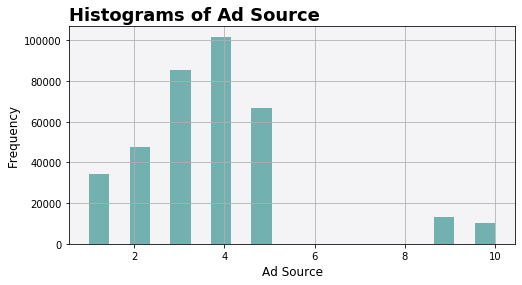

In [34]:
# Data distribution by source
f, ax = plt.subplots(figsize=(8,4))
visits['source_id'].hist(bins=20, color='#73B0B0', ax=ax)

ax.set_facecolor('#F4F4F7')

ax.set_xlabel('Ad Source', fontname='tahoma', fontsize=12)
ax.set_ylabel('Frequency', fontname='tahoma', fontsize=12)

plt.title('Histograms of Ad Source', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

Most users came to the site after looking at ad #4, followed by ad #3.

Evaluating the time range between three datasets,

In [35]:
# Checking datetime range
visits[['start_ts', 'end_ts']].describe(include='all')

,start_ts,end_ts
count,359400,359400
unique,224303,224760
top,2017-11-24 16:06:00,2017-11-24 16:51:00
freq,19,23
first,2017-06-01 00:01:00,2017-06-01 00:02:00
last,2018-05-31 23:59:00,2018-06-01 01:26:00


In [36]:
# Checking datetime range
orders['buy_ts'].describe(include='all')

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

In [37]:
# Checking datetime range
costs['dt'].describe(include='all')

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

All dataset started from Jun 1st, 2017, however some data has different end date. The `visits` and `orders` dataframes end at Jun 1st, 2018 while the `costs` dataframe ended one month ealier at May 31st, 2018.

## Step 3: Data Analysis<a class="anchor" id="step_3"></a>

### Visits: Evaluating `visits` dataset<a class="anchor" id="step_3_1"></a>

The first analysis we would like to find out is how many people visited our site and how the user spend their time in the site. 

**How many people use it every day, week, and month?**

In [38]:
# Extracting the year, month, and week
visits['year'] = visits['start_ts'].dt.year
visits['month'] = visits['start_ts'].dt.month
visits['week'] = visits['start_ts'].dt.week
visits['day'] = visits['start_ts'].dt.day

We can calculate the daily user visit by finding unique users and group them per day.

In [39]:
# Grouping the dataframe on week and calculating the number of unique users
dau = visits.groupby(['year', 'month', 'day']).agg({'uid':'nunique'}).reset_index()

# Renaming the columns
dau.columns = ['year', 'month', 'day', 'n_user_day']
dau.head()

,year,month,day,n_user_day
0,2017,6,1,605
1,2017,6,2,608
2,2017,6,3,445
3,2017,6,4,476
4,2017,6,5,820


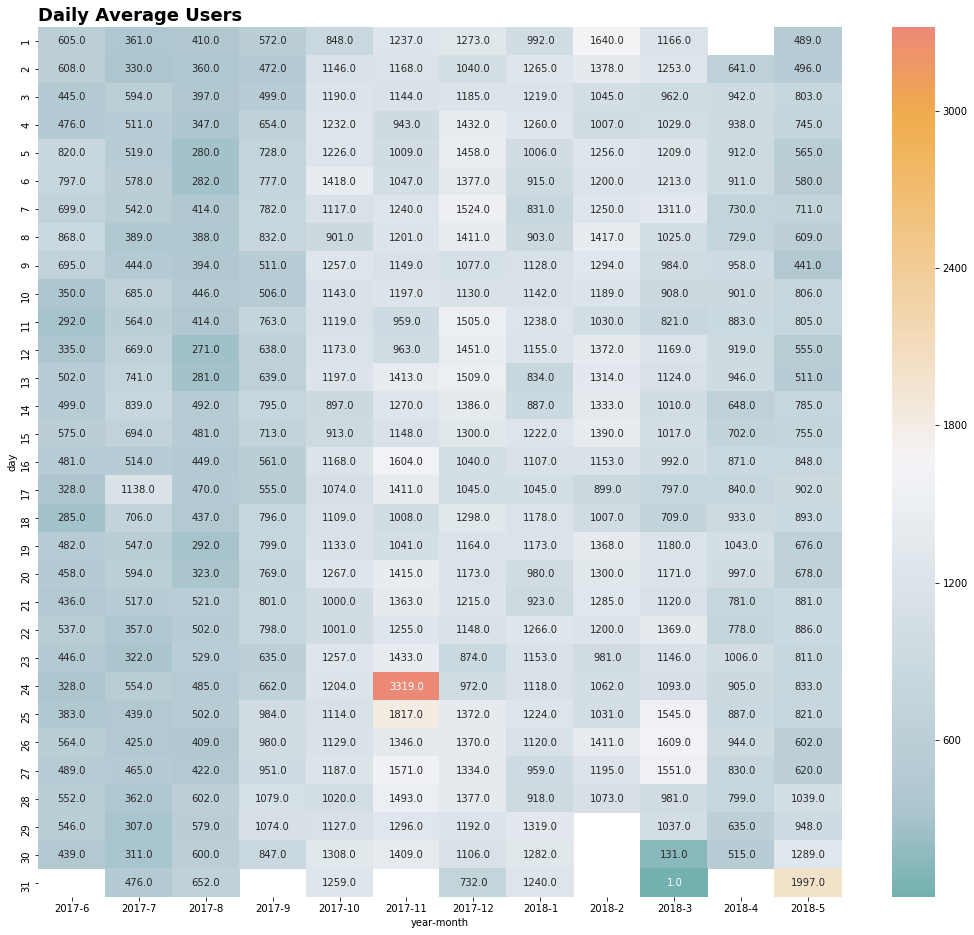

In [40]:
dau_pivot = dau.pivot_table(index='day', columns=['year', 'month'], values='n_user_day')

# Customizing the heatmap's color map
def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb = mc.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

hc = ['#73B0B0', '#AEC6CF', '#F4F4F7', '#F0AD4B', '#ED8977']
th = [0, 0.1, 0.5, 0.9, 1]

cdict = NonLinCdict(th, hc)
cm = mc.LinearSegmentedColormap('test', cdict)

plt.figure(figsize=(18,16))
sns.heatmap(dau_pivot, annot=True, cmap=cm, fmt='.1f')
plt.title('Daily Average Users', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

The heat map shows how many users visited the website every day for one year period. In general, visitors came in more frequently towards the end of the year, starting in October 2017 until the first quarter of the new year in March 2018. On Black Friday, 24 November 2017, the customer visit reaches the highest peak with 3319 visitors. On the other hand, there is a moment on 31 March 2018 where the number suddenly dropped to only one visit.

In [41]:
print('In general the total number of visitors per day is {:.1f} visitors'.format(dau.n_user_day.mean()))

In general the total number of visitors per day is 908.0 visitors


Next finding how many visits per week,

In [42]:
# Grouping the dataframe on week and calculating the number of unique users
wau = visits.groupby(['year', 'week']).agg({'uid':'nunique'}).reset_index()

# Renaming the columns
wau.columns = ['year', 'week', 'n_user_week']
wau.head()

,year,week,n_user_week
0,2017,22,2021
1,2017,23,4129
2,2017,24,2812
3,2017,25,2878
4,2017,26,3064


In [43]:
print('The weekly average users is {:.1f} visitors'.format(wau.n_user_week.mean()))

The weekly average users is 5716.2 visitors


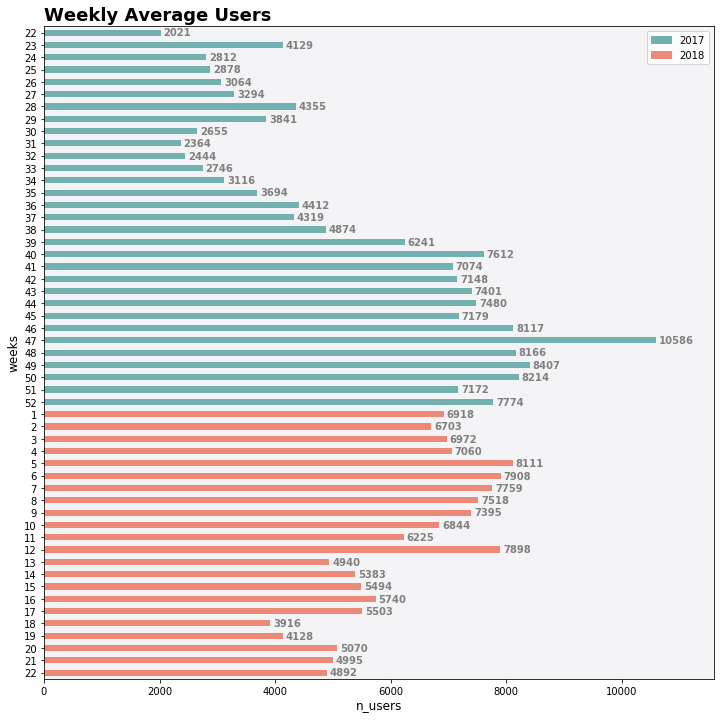

In [44]:
# Plotting the graph
# Assigning colors on different years for visualization
wau['color'] = ['#73B0B0' if x == 2017 else '#ED8977' for x in wau.year]

# Plotting the graphs
f, ax = plt.subplots(figsize=(12,12), )
wau.set_index('week')['n_user_week'].plot(kind='barh', color=wau['color'].values, ax=ax)

# Showing bar values
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()+50, i.get_y()+ i.get_height(),
             str(round(( i.get_width()), 2)),
             fontsize = 10, fontweight = 'bold', 
             color='grey')

# Inverting the y-axis so the scale has ascending values
ax.invert_yaxis()

# Setting the facecolor
ax.set_facecolor('#F4F4F7')

# Setting x-axis range 
ax.axes.set_xlim(0, max(wau.n_user_week)+1000)

# Naming the axis labels
ax.set_xlabel('n_users', fontname='tahoma', fontsize=12)
ax.set_ylabel('weeks', fontname='tahoma', fontsize=12)

# Creating custom legend
lgd_2017 = mpatches.Patch(color='#73B0B0', label='2017')
lgd_2018 = mpatches.Patch(color='#ED8977', label='2018')
plt.legend(handles=[lgd_2017, lgd_2018])

# Setting the plot titlwe
plt.title('Weekly Average Users', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

The graphs show the weekly average users of the website. On average, we can expect 5716 visits every week. However, we can see the same occurrence at the 47th week in 2017 where the visit suddenly jumped out. The number of visits stays high throughout the end of 2017.  There was an increase in the 12th week of 2018, which coincides with school spring break until it drops to not much more than 5740 visits per week.

We continue our analysis by finding the number of visitors every month. We can do a similar step as before, but this time we group the visits by month.

In [45]:
# Grouping the dataframe on week and calculating the number of unique users
mau = visits.groupby(['year', 'month']).agg({'uid':'nunique'}).reset_index()

# Renaming the columns
mau.columns = ['year', 'month', 'n_user_month']
mau.head()

,year,month,n_user_month
0,2017,6,13259
1,2017,7,14183
2,2017,8,11631
3,2017,9,18975
4,2017,10,29692


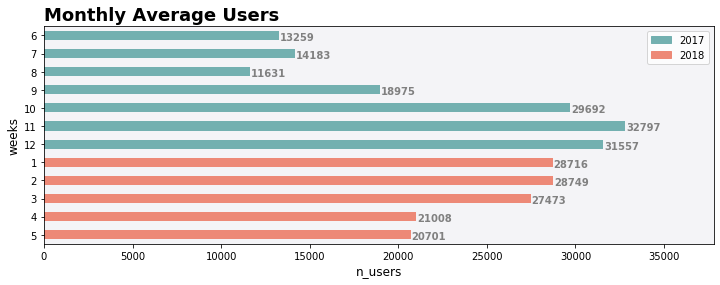

In [46]:
# Assigning colors on different years for visualization
mau['color'] = ['#73B0B0' if x == 2017 else '#ED8977' for x in mau.year]

# Plotting the graphs
f, ax = plt.subplots(figsize=(12,4), )
mau.set_index('month')['n_user_month'].plot(kind='barh', color=mau['color'].values, ax=ax)

# Showing bar values
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()+50, i.get_y()+ i.get_height(),
             str(round(( i.get_width()), 2)),
             fontsize = 10, fontweight = 'bold', 
             color='grey')

# Inverting the y-axis so the scale has ascending values
ax.invert_yaxis()

# Setting the facecolor
ax.set_facecolor('#F4F4F7')

# Setting x-axis range 
ax.axes.set_xlim(0, max(mau.n_user_month)+5000)

# Naming the axis labels
ax.set_xlabel('n_users', fontname='tahoma', fontsize=12)
ax.set_ylabel('weeks', fontname='tahoma', fontsize=12)

# Creating custom legend
lgd_2017 = mpatches.Patch(color='#73B0B0', label='2017')
lgd_2018 = mpatches.Patch(color='#ED8977', label='2018')
plt.legend(handles=[lgd_2017, lgd_2018])

# Setting the plot titlwe
plt.title('Monthly Average Users', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

In [47]:
print('The monthly average user {:.1f} visitors'.format(mau.n_user_month.mean()))

The monthly average user 23228.4 visitors


On average, we can expect 23,228 visitors per month. The WAU graphs agree with the weekly trend we discussed earlier. Toward the end of the year, the number of visitors increased. The graphs peaked in November 2017, where Black Friday takes place.

In [48]:
# Creating new df 
dau_with_week = visits.groupby(['year', 'month', 'week', 'day']).agg({'uid':'nunique'}).reset_index()
dau_with_week.columns = ['year', 'month', 'day', 'week', 'n_user_day']
dau_with_week.head()

,year,month,day,week,n_user_day
0,2017,6,22,1,605
1,2017,6,22,2,608
2,2017,6,22,3,445
3,2017,6,22,4,476
4,2017,6,23,5,820


In [49]:
X

,year,month,day,week,n_user_day,n_user_week,color,sf_per_week
0,2017,6,25,22,537,2021,#73B0B0,26.571004
1,2017,7,29,22,357,2021,#73B0B0,17.664523
2,2017,8,34,22,502,2021,#73B0B0,24.839189
3,2017,9,38,22,798,2021,#73B0B0,39.485403
4,2017,10,42,22,1001,2021,#73B0B0,49.529936


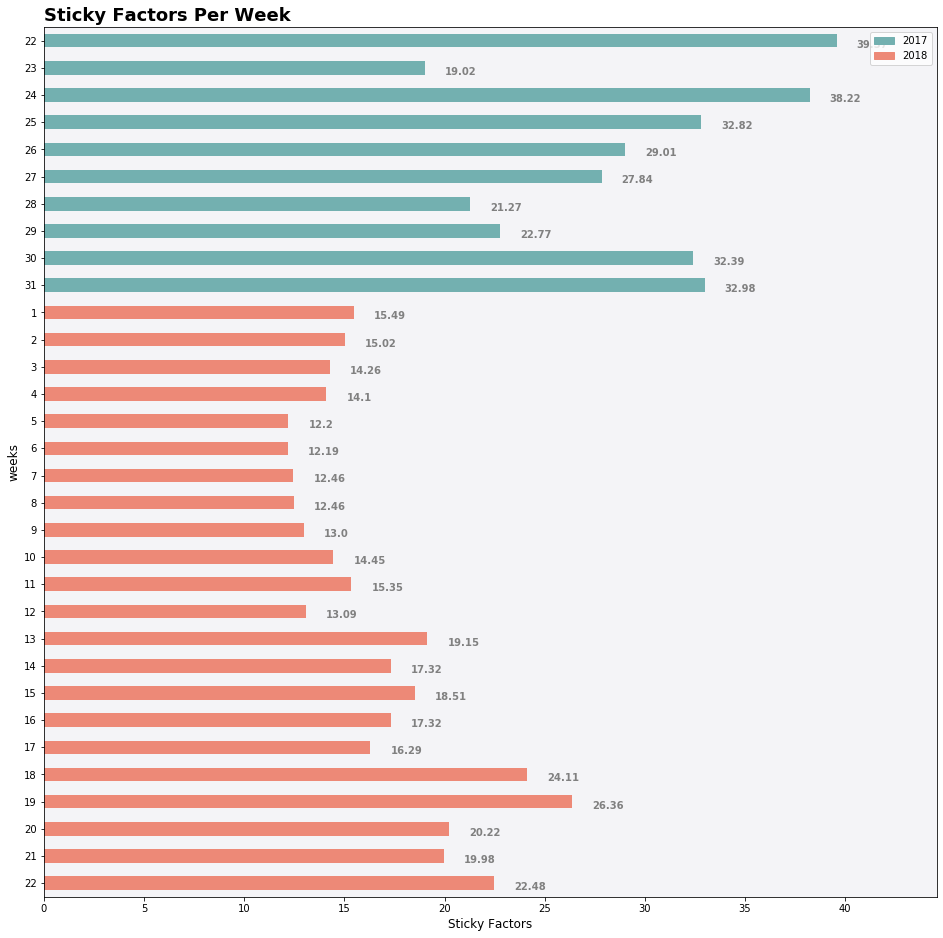

In [50]:
# Calculating and visualizing sticky factor

sticky_factor_week_ = sticky_factor_week.groupby(['year','week']).mean().reset_index()


# Plotting the graph
# Assigning colors on different years for visualization
sticky_factor_week_['color'] = ['#73B0B0' if x == 2017 else '#ED8977' for x in sticky_factor_week_.year]

# Plotting the graphs
f, ax = plt.subplots(figsize=(16,16), )
sticky_factor_week_.set_index('week')['sf_per_week'].plot(kind='barh', color=sticky_factor_week_.color.values, ax=ax)

# Showing bar values
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()+1, i.get_y()+ i.get_height(),
             str(round(( i.get_width()), 2)),
             fontsize = 10, fontweight = 'bold', 
             color='grey')

# Inverting the y-axis so the scale has ascending values
ax.invert_yaxis()

# Setting the facecolor
ax.set_facecolor('#F4F4F7')

# Setting x-axis range 
ax.axes.set_xlim(0, max(sticky_factor_week_.sf_per_week)+5)

# Naming the axis labels
ax.set_xlabel('Sticky Factors', fontname='tahoma', fontsize=12)
ax.set_ylabel('weeks', fontname='tahoma', fontsize=12)

# Creating custom legend
lgd_2017 = mpatches.Patch(color='#73B0B0', label='2017')
lgd_2018 = mpatches.Patch(color='#ED8977', label='2018')
plt.legend(handles=[lgd_2017, lgd_2018])

# Setting the plot titlwe
plt.title('Sticky Factors Per Week', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

In [51]:
# Sticky factor per week (SFPW)
sticky_factor_month = pd.merge(dau, mau, on='month')

sticky_factor_month['sf_per_month'] = (sticky_factor_month['n_user_day']/sticky_factor_month['n_user_month'])*100
sticky_factor_month.head()

,year_x,month,day,n_user_day,year_y,n_user_month,color,sf_per_month
0,2017,6,1,605,2017,13259,#73B0B0,4.562938
1,2017,6,2,608,2017,13259,#73B0B0,4.585565
2,2017,6,3,445,2017,13259,#73B0B0,3.356211
3,2017,6,4,476,2017,13259,#73B0B0,3.590014
4,2017,6,5,820,2017,13259,#73B0B0,6.184478


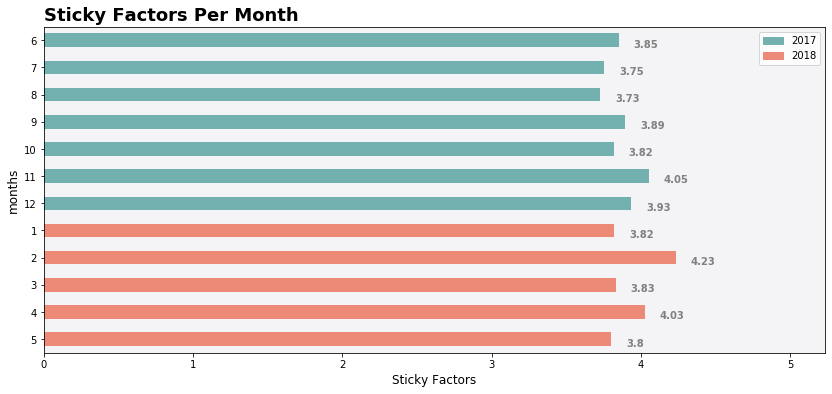

In [52]:
# Calculating and visualizing sticky factor

sticky_factor_month_ = sticky_factor_month.groupby(['year_x','month']).mean().reset_index()


# Plotting the graph
# Assigning colors on different years for visualization
sticky_factor_month_['color'] = ['#73B0B0' if x == 2017 else '#ED8977' for x in sticky_factor_month_.year_x]

# Plotting the graphs
f, ax = plt.subplots(figsize=(14,6), )
sticky_factor_month_.set_index('month')['sf_per_month'].plot(kind='barh', color=sticky_factor_month_.color.values, ax=ax)

# Showing bar values
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()+0.1, i.get_y()+ i.get_height(),
             str(round(( i.get_width()), 2)),
             fontsize = 10, fontweight = 'bold', 
             color='grey')

# Inverting the y-axis so the scale has ascending values
ax.invert_yaxis()

# Setting the facecolor
ax.set_facecolor('#F4F4F7')

# Setting x-axis range 
ax.axes.set_xlim(0, max(sticky_factor_month_.sf_per_month)+1)

# Naming the axis labels
ax.set_xlabel('Sticky Factors', fontname='tahoma', fontsize=12)
ax.set_ylabel('months', fontname='tahoma', fontsize=12)

# Creating custom legend
lgd_2017 = mpatches.Patch(color='#73B0B0', label='2017')
lgd_2018 = mpatches.Patch(color='#ED8977', label='2018')
plt.legend(handles=[lgd_2017, lgd_2018])

# Setting the plot titlwe
plt.title('Sticky Factors Per Month', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

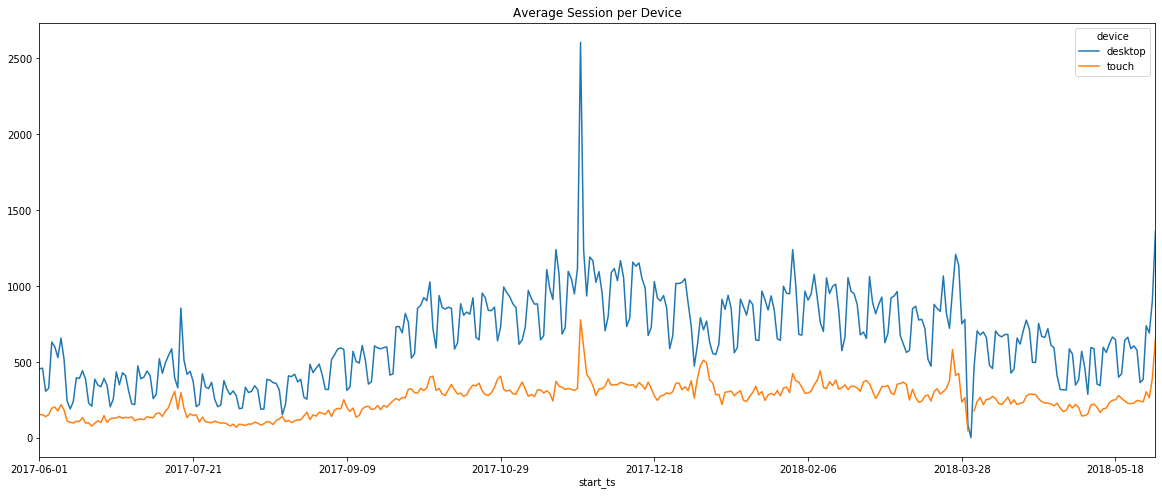

In [53]:
# average number of sessions per day per device
fig,ax = plt.subplots(figsize=(20,8))
(visits
 .pivot_table(index=visits['start_ts'].dt.strftime('%Y-%m-%d'), 
              columns='device', 
              values='uid', 
              aggfunc='nunique')
 .plot(ax=ax)
)

plt.title('Average Session per Device')
plt.show()

The majority of users access the site using a desktop. Mostly the trend of these two plots agrees with each other.

**Sessions per day**

One user can visit the website more than once. With that in mind, we would like to know how many sessions per day from all users. We can found the number using the `count` value in the `agg` method of the `groupby` function.

,year,month,day,n_visit
0,2017,6,1,664
1,2017,6,2,658
2,2017,6,3,477
3,2017,6,4,510
4,2017,6,5,893


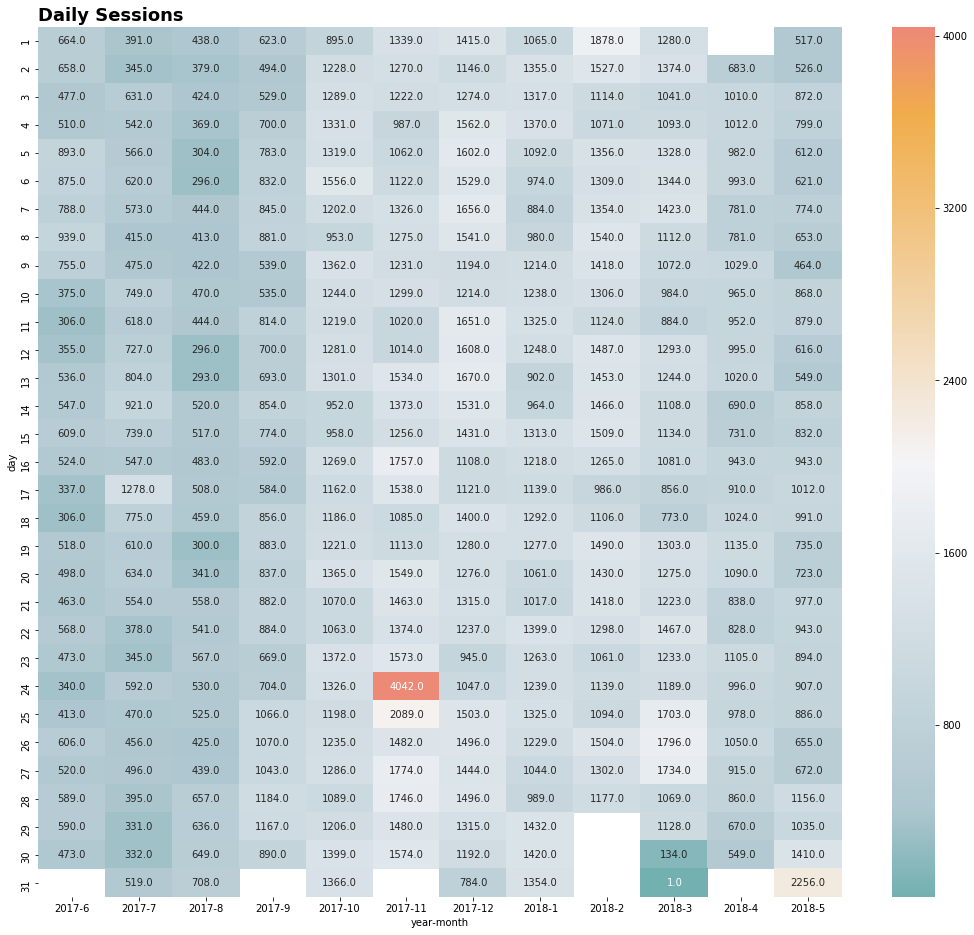

In [55]:
session_pivot = session.pivot_table(index='day', columns=['year','month'], values='n_visit', aggfunc='sum')

plt.figure(figsize=(18,16))
sns.heatmap(session_pivot, annot=True, fmt='.1f', cmap=cm)
plt.title('Daily Sessions', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

In [56]:
print('The number of sessions per day is {:.1f}'.format(session.n_visit.mean()))

The number of sessions per day is 987.4


Previously we found out that the number of unique daily users is 908 visitors. On the other hand, the average daily session is 987.4. We can calculate the ratio of n_unique visitors and the daily session and see how it behaves throughout the year.

In [57]:
# Comparing sessions per day against DAU
session_dau = session[['year', 'month', 'day']]
session_dau['ratio'] = session['n_visit'] / dau['n_user_day']
session_dau.head()

,year,month,day,ratio
0,2017,6,1,1.097521
1,2017,6,2,1.082237
2,2017,6,3,1.071910
3,2017,6,4,1.071429
4,2017,6,5,1.089024


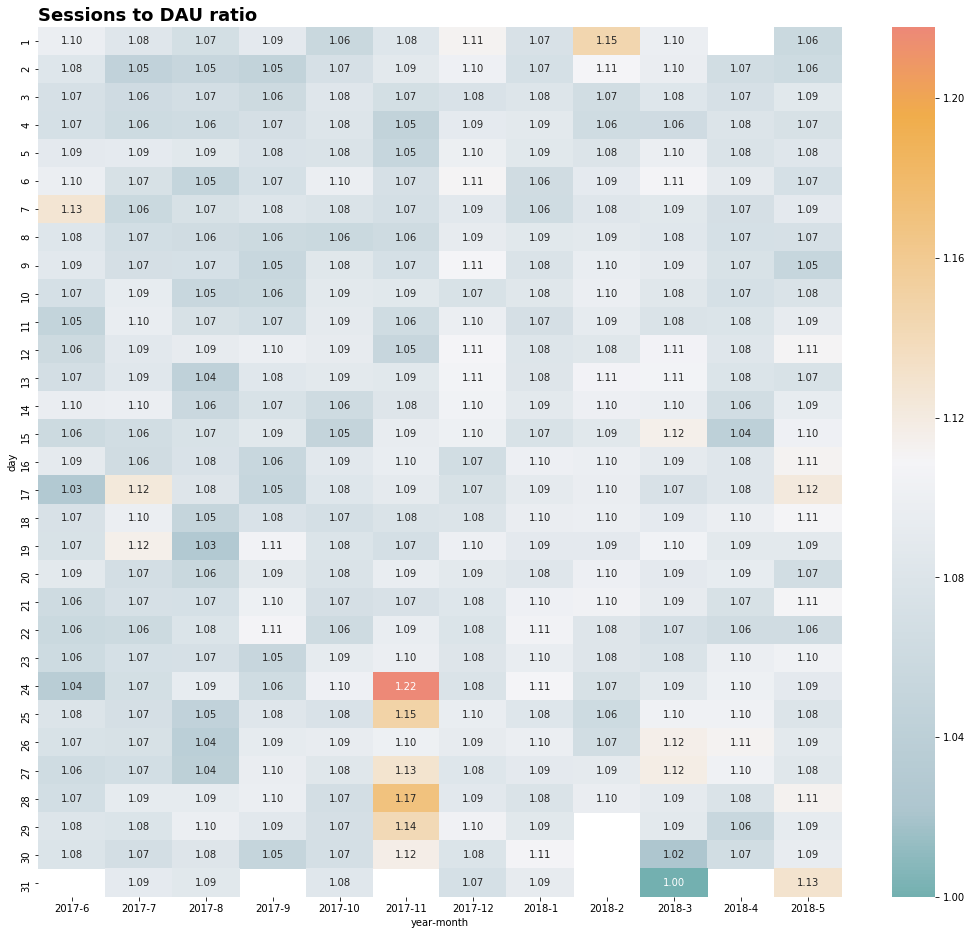

In [58]:
session_dau_pivot = session_dau.pivot_table(index='day', columns=['year','month'], values='ratio', aggfunc='mean')

plt.figure(figsize=(18,16))
sns.heatmap(session_dau_pivot, annot=True, fmt='.2f', cmap=cm)
plt.title('Sessions to DAU ratio', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

In [59]:
print('session to DAU ratio is {:.2f}'.format(session_dau.ratio.mean()))

session to DAU ratio is 1.08


Generally, the ratio of sessions over the visit is 1.08. In other words, eight users visit the website two times in one hundred users. This is a pretty small amount, so we can confidently say that users only see the site once on regular days.  However, during high season the percentage could reach 1.22. 

It its also interesting to see from which device the visitors came from,

In [60]:
session_device = visits.groupby(['device', 'year', 'month', 'day']).agg({'uid':'count'}).reset_index()
session_device.head()

,device,year,month,day,uid
0,desktop,2017,6,1,501
1,desktop,2017,6,2,498
2,desktop,2017,6,3,329
3,desktop,2017,6,4,349
4,desktop,2017,6,5,693


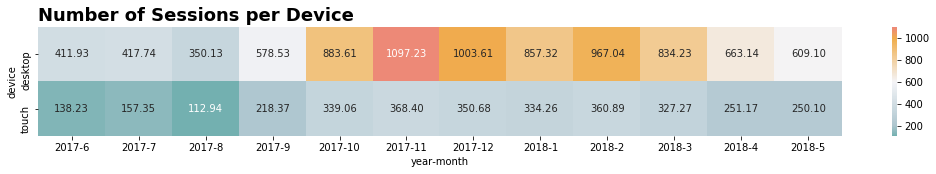

In [61]:
plt.figure(figsize=(18,2))
sns.heatmap(session_device
            .pivot_table(index='device', 
                         columns=['year', 'month'], 
                         values='uid', aggfunc='mean'), 
            annot=True, fmt='.2f', cmap=cm)
plt.title('Number of Sessions per Device', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

Most visitors came from desktop users instead of touch devices.

In [62]:
# Converting the datetime to month-based
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')

# Creating cohort by grouping users
first_visit_month = visits.groupby('uid').agg({'visit_month':'min'}).reset_index()
first_visit_month.columns = ['uid', 'first_visit_month']
first_visit_month.head()

,uid,first_visit_month
0,11863502262781,2018-03-01
1,49537067089222,2018-02-01
2,297729379853735,2017-06-01
3,313578113262317,2017-09-01
4,325320750514679,2017-09-01


In [63]:
# Merging first_visit
visits = visits.merge(first_visit_month, on='uid')
visits.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,day,visit_month,first_visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,20,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,19,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,1,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,20,2018-05-01,2018-03-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,9,2018-03-01,2018-03-01


In [64]:
session_ = visits.groupby(['first_visit_month', 'visit_month', 'source_id', 'device']).agg({'uid':'count'}).reset_index()
session_.head()

,first_visit_month,visit_month,source_id,device,uid
0,2017-06-01,2017-06-01,1,desktop,1228
1,2017-06-01,2017-06-01,1,touch,316
2,2017-06-01,2017-06-01,2,desktop,1682
3,2017-06-01,2017-06-01,2,touch,509
4,2017-06-01,2017-06-01,3,desktop,3511


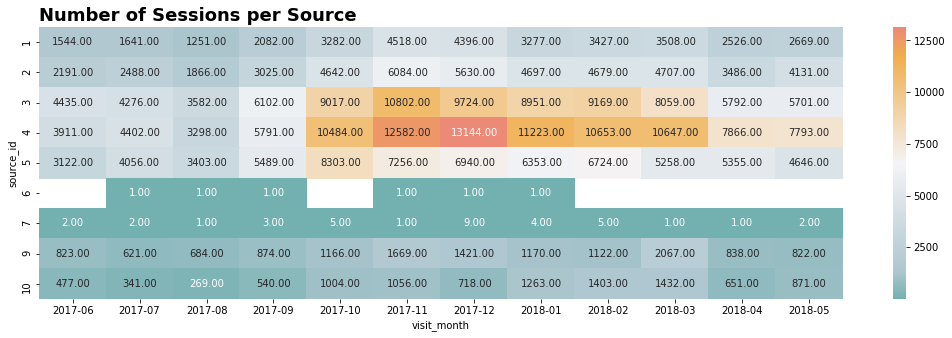

In [65]:
session_source = session_.pivot_table(index=['source_id'], 
                                      columns=session_['visit_month'].dt.strftime('%Y-%m'), 
                                      values='uid',aggfunc='sum')

plt.figure(figsize=(18,5))
sns.heatmap(session_source, annot=True, fmt='.2f', cmap=cm)
plt.title('Number of Sessions per Source', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

Looking at the heatmap above, we see that ad source #3, #4, and #5 brought the most visitors to the site. At the end of the year, source #4 made the highest visit with 13144 sessions. On the other hand, source #7 performed poorly by attracting not more than nine sessions in a month.

**What is the length of each session?**

We can find each session's duration by finding the difference between `start_time` and `end_time`,

In [66]:
# Calulating the duration of each session
visits['start_time'] = visits['start_ts'].astype('datetime64[m]')
visits['end_time'] = visits['end_ts'].astype('datetime64[m]')
visits['duration'] = visits['end_time'] - visits['start_time']
visits['duration'] = visits['duration'] / np.timedelta64(1, 'm')
visits.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,day,visit_month,first_visit_month,start_time,end_time,duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,20,2017-12-01,2017-12-01,2017-12-20 17:20:00,2017-12-20 17:38:00,18.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,19,2018-02-01,2018-02-01,2018-02-19 16:53:00,2018-02-19 17:21:00,28.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,1,2017-07-01,2017-07-01,2017-07-01 01:54:00,2017-07-01 01:54:00,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,20,2018-05-01,2018-03-01,2018-05-20 10:59:00,2018-05-20 11:23:00,24.0
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,9,2018-03-01,2018-03-01,2018-03-09 20:05:00,2018-03-09 20:33:00,28.0


In [67]:
print('The average session length {:.1f} minutes'.format(visits.duration.mean()))

The average session length 10.7 minutes


We can elaborate this result by finding the average session for each unique users,

In [68]:
print('The average session length for a single user is {:.1f} minutes'
      .format(visits.groupby('uid').mean()['duration'].mean()))

The average session length for a single user is 8.8 minutes


In [69]:
# Extracting the seconds from the original timestamp
visits['visit_lengths'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits.head(3)

,device,end_ts,source_id,start_ts,uid,year,month,week,day,visit_month,first_visit_month,start_time,end_time,duration,visit_lengths
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,20,2017-12-01,2017-12-01,2017-12-20 17:20:00,2017-12-20 17:38:00,18.0,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,19,2018-02-01,2018-02-01,2018-02-19 16:53:00,2018-02-19 17:21:00,28.0,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,1,2017-07-01,2017-07-01,2017-07-01 01:54:00,2017-07-01 01:54:00,0.0,0


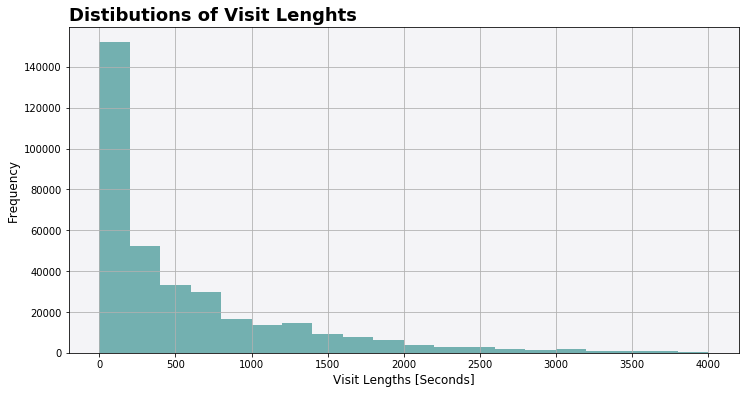

In [70]:
# Plotting the graphs
f, ax = plt.subplots(figsize=(12,6), )
visits['visit_lengths'].hist(bins=20, range=(0,4000), ax=ax, color='#73B0B0')

# Setting the facecolor
ax.set_facecolor('#F4F4F7')

# Naming the axis labels
ax.set_xlabel('Visit Lengths [Seconds]', fontname='tahoma', fontsize=12)
ax.set_ylabel('Frequency', fontname='tahoma', fontsize=12)

# Setting the plot title
plt.title('Distibutions of Visit Lenghts', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

The histogram is showing the distribution of visit lenghts from all sessions. Since the distribution is skewed then we will take the median as the the average value,

In [71]:
print('The average length of visit: {} seconds'.format(visits['visit_lengths'].median()))

The average length of visit: 300.0 seconds


We got the average time of visits equals to 300 secs. Visualizing daily sessions for the entire year,

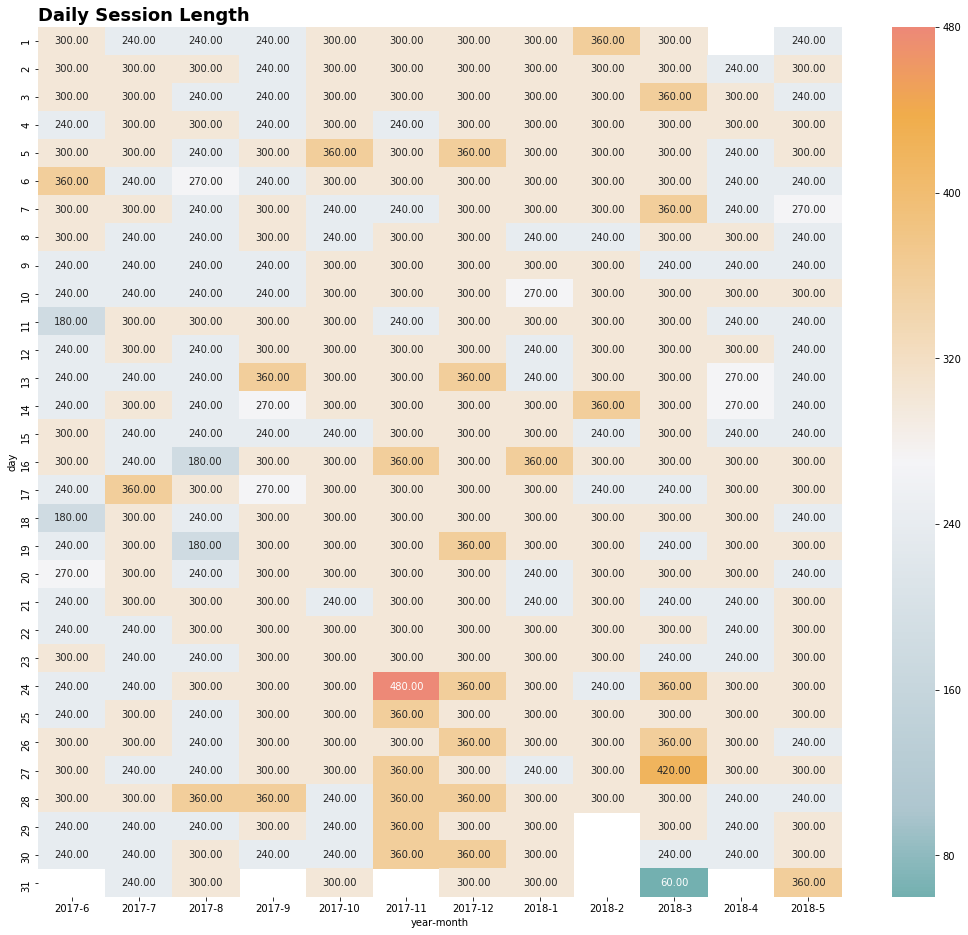

In [72]:
# Session length per day
session_length_daily = visits.pivot_table(index='day', 
                                          columns=['year','month'], 
                                          values='visit_lengths', 
                                          aggfunc='median')

plt.figure(figsize=(18,16))
sns.heatmap(session_length_daily, annot=True, fmt='.2f', cmap=cm)
plt.title('Daily Session Length', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

We can see in detail how long users stayed on the site for any particular day on the heatmap above. Users spent more time in November and December than in any other months, although not significantly different. 

There was also a sudden drop on 31 March 2018, where most users spent only a second on the site. The value seems nonsensical, so we can conclude that there might be a problem in our system, possibly a server down.

Moreover we can find the session lengths for each ad source, 

In [73]:
# Session length based on source
#visits.groupby(['source_id']).mean()['duration']

visits.groupby(['source_id']).mean()['visit_lengths']

source_id
1     1039.361156
2      844.717318
3      573.283705
4      559.841042
5      526.742187
6     1370.000000
7      606.666667
9      572.543496
10     662.443890
Name: visit_lengths, dtype: float64

Visitors from ad source #1, #2, and #6 spent the most time on the site. Visitors from other sources spend more or less the same amount of time. 

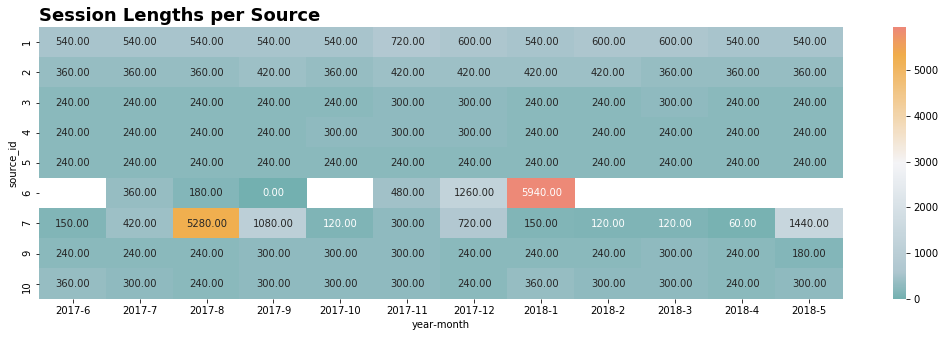

In [74]:
# Visualizing the heatmap
#visits.pivot_table(index='source_id', columns=['year','month'], values='duration', aggfunc='mean')


plt.figure(figsize=(18,5))
sns.heatmap(visits
            .pivot_table(index='source_id', 
                         columns=['year','month'], 
                         values='visit_lengths', 
                         aggfunc='median'), 
            annot=True, fmt='.2f', cmap=cm)
plt.title('Session Lengths per Source', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

From the heat map above, we can see a unique event in January 2018, where users from source #6 spent almost 1,5 hours on the site. It happened to the user with `uid` `12223048503887313424` (see below).  The same events went with the user with `uid` `11377414203346034748` from source #7 in October 2017.

In [75]:
visits.query('source_id == 6 and visit_lengths > 5900')

,device,end_ts,source_id,start_ts,uid,year,month,week,day,visit_month,first_visit_month,start_time,end_time,duration,visit_lengths
80795,desktop,2018-01-16 22:49:00,6,2018-01-16 21:10:00,12223048503887313424,2018,1,3,16,2018-01-01,2018-01-01,2018-01-16 21:10:00,2018-01-16 22:49:00,99.0,5940


In [76]:
visits.query('source_id == 7 and visit_lengths > 5200')

,device,end_ts,source_id,start_ts,uid,year,month,week,day,visit_month,first_visit_month,start_time,end_time,duration,visit_lengths
160985,desktop,2017-08-17 11:56:00,7,2017-08-17 10:28:00,11377414203346034748,2017,8,33,17,2017-08-01,2017-08-01,2017-08-17 10:28:00,2017-08-17 11:56:00,88.0,5280


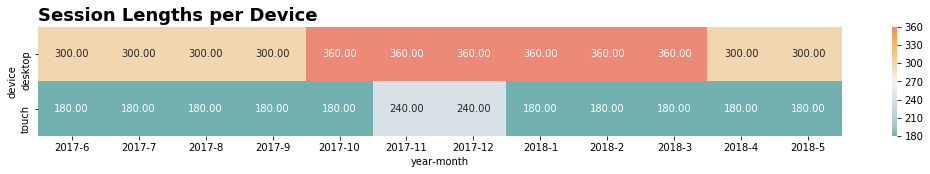

In [77]:
# Visualizing the heatmap
# visits.pivot_table(index='source_id', columns=['year','month'], values='duration', aggfunc='mean')


plt.figure(figsize=(18,2))
sns.heatmap(visits
            .pivot_table(index='device', 
                         columns=['year','month'], 
                         values='visit_lengths', 
                         aggfunc='median'), 
            annot=True, fmt='.2f', cmap=cm)
plt.title('Session Lengths per Device', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()



We can see the session length based on the device and conclude more time spent using a desktop.

**How often do users come back?**

In this section, we want to know the retention rate of our users. The retention rate is defined as the number of active users at different periods divided by the initial size of the same group. To find the retention rate, we must find the first time each user visited the site and put them into the same group. We then calculate the size of
each group. Since we have data for a year, we can form a monthly cohort to understand the data easier. Hence we are going to calculate how many users each cohort visited the website after their initial visit.

In [78]:
visits.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,day,visit_month,first_visit_month,start_time,end_time,duration,visit_lengths
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,20,2017-12-01,2017-12-01,2017-12-20 17:20:00,2017-12-20 17:38:00,18.0,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,19,2018-02-01,2018-02-01,2018-02-19 16:53:00,2018-02-19 17:21:00,28.0,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,1,2017-07-01,2017-07-01,2017-07-01 01:54:00,2017-07-01 01:54:00,0.0,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,20,2018-05-01,2018-03-01,2018-05-20 10:59:00,2018-05-20 11:23:00,24.0,1440
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,9,2018-03-01,2018-03-01,2018-03-09 20:05:00,2018-03-09 20:33:00,28.0,1680


In [79]:
cohort = visits.groupby(['first_visit_month', 'visit_month',]).agg({'uid':'nunique'}).reset_index()
cohort.head()

,first_visit_month,visit_month,uid
0,2017-06-01,2017-06-01,13259
1,2017-06-01,2017-07-01,1043
2,2017-06-01,2017-08-01,713
3,2017-06-01,2017-09-01,814
4,2017-06-01,2017-10-01,909


In [80]:
# Calculating the lifetime of each rows
cohort['lifetime'] = cohort['visit_month'] - cohort['first_visit_month']
cohort['lifetime'] = cohort['lifetime'] / np.timedelta64(1,'M')
cohort['lifetime'] = cohort['lifetime'].round().astype('int')
cohort.head()

,first_visit_month,visit_month,uid,lifetime
0,2017-06-01,2017-06-01,13259,0
1,2017-06-01,2017-07-01,1043,1
2,2017-06-01,2017-08-01,713,2
3,2017-06-01,2017-09-01,814,3
4,2017-06-01,2017-10-01,909,4


In [81]:
# Calculating the size of each cohort at 0th day
cohort_size = visits.groupby('first_visit_month').agg({'uid':'nunique'}).reset_index()
cohort_size.columns = ['first_visit_month', 'size']
cohort_size

,first_visit_month,size
0,2017-06-01,13259
1,2017-07-01,13140
2,2017-08-01,10181
3,2017-09-01,16704
4,2017-10-01,25977
5,2017-11-01,27248
6,2017-12-01,25268
7,2018-01-01,22624
8,2018-02-01,22197
9,2018-03-01,20589


In [82]:
cohort_ = pd.merge(cohort, cohort_size, on='first_visit_month', how='left')
cohort_.head()

,first_visit_month,visit_month,uid,lifetime,size
0,2017-06-01,2017-06-01,13259,0,13259
1,2017-06-01,2017-07-01,1043,1,13259
2,2017-06-01,2017-08-01,713,2,13259
3,2017-06-01,2017-09-01,814,3,13259
4,2017-06-01,2017-10-01,909,4,13259


In [83]:
# Calculating retention
cohort_['retention'] = cohort_['size'] / cohort_['uid']

In [84]:
cohort_

,first_visit_month,visit_month,uid,lifetime,size,retention
0,2017-06-01,2017-06-01,13259,0,13259,1.000000
1,2017-06-01,2017-07-01,1043,1,13259,12.712368
2,2017-06-01,2017-08-01,713,2,13259,18.596073
3,2017-06-01,2017-09-01,814,3,13259,16.288698
4,2017-06-01,2017-10-01,909,4,13259,14.586359
...,...,...,...,...,...,...
73,2018-03-01,2018-04-01,861,1,20589,23.912892
74,2018-03-01,2018-05-01,557,2,20589,36.964093
75,2018-04-01,2018-04-01,15709,0,15709,1.000000
76,2018-04-01,2018-05-01,760,1,15709,20.669737


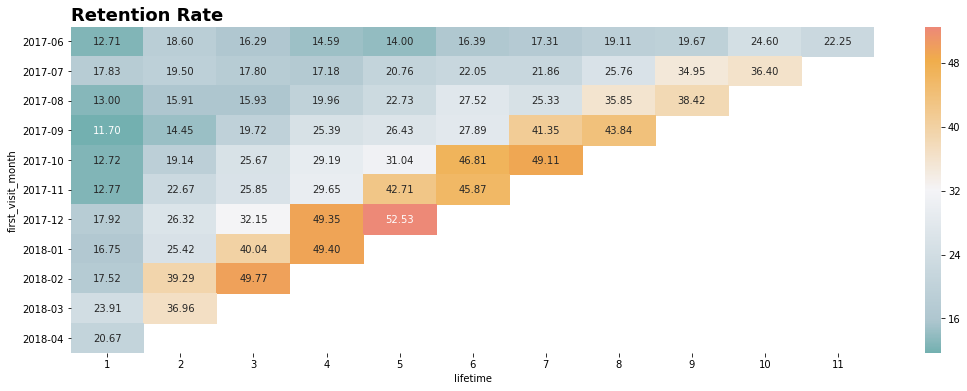

In [85]:
# Visualizing the heatmap
plt.figure(figsize=(18,6))
sns.heatmap(cohort_
            .query('lifetime > 0') # We are not interested in retention at 0th period since the values are always 1
            .pivot_table(index=cohort_['first_visit_month'].dt.strftime('%Y-%m'), 
                         columns='lifetime', 
                         values='retention', 
                         aggfunc='sum'), 
            annot=True, fmt='.2f', cmap=cm)
plt.title('Retention Rate', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

The retention rate heatmap shows us that most cohorts increased their rate in the 2nd month. Additionally, although not valid for every cohort, generally, the retention rate rises steadily, especially for end-of-year cohorts where the number of retention improves.

Creating cohort by finding the first time a new user visited the site,

In [86]:
first_activity_date = visits.groupby(['uid'])['first_visit_month'].min()
first_activity_date.head()

uid
11863502262781    2018-03-01
49537067089222    2018-02-01
297729379853735   2017-06-01
313578113262317   2017-09-01
325320750514679   2017-09-01
Name: first_visit_month, dtype: datetime64[ns]

Calculating the cohorts size,

In [87]:
cohort_size = visits.groupby(['first_visit_month']).agg({'uid':'count'})
cohort_size.head()

,uid
first_visit_month,
2017-06-01,40863
2017-07-01,25370
2017-08-01,18671
2017-09-01,28795
2017-10-01,41682


Calculating the age of each cohort,

In [88]:
visits['age'] = visits['visit_month'] - visits['first_visit_month']
visits['age'] = visits['age'] / np.timedelta64(1,'M')
visits['age'] = visits['age'].round().astype('int')
visits.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,day,visit_month,first_visit_month,start_time,end_time,duration,visit_lengths,age
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,20,2017-12-01,2017-12-01,2017-12-20 17:20:00,2017-12-20 17:38:00,18.0,1080,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,19,2018-02-01,2018-02-01,2018-02-19 16:53:00,2018-02-19 17:21:00,28.0,1680,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,1,2017-07-01,2017-07-01,2017-07-01 01:54:00,2017-07-01 01:54:00,0.0,0,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,20,2018-05-01,2018-03-01,2018-05-20 10:59:00,2018-05-20 11:23:00,24.0,1440,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,9,2018-03-01,2018-03-01,2018-03-09 20:05:00,2018-03-09 20:33:00,28.0,1680,0


Visualizing the number of new users every month,

In [89]:
visits_pivot = visits.pivot_table(index=visits['first_visit_month'].dt.strftime('%Y-%m'),
                   columns='age',
                   values='uid',
                   aggfunc='nunique')
visits_pivot

age,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,NaN
2017-08,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,NaN,NaN
2017-09,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,NaN,NaN,NaN
2017-10,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,NaN,NaN,NaN,NaN
2017-11,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,NaN,NaN,NaN,NaN,NaN
2017-12,25268.0,1410.0,960.0,786.0,512.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,22624.0,1351.0,890.0,565.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,22197.0,1267.0,565.0,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Getting the size of each cohort at the 0th month,

In [90]:
visits_pivot[0]

first_visit_month
2017-06    13259.0
2017-07    13140.0
2017-08    10181.0
2017-09    16704.0
2017-10    25977.0
2017-11    27248.0
2017-12    25268.0
2018-01    22624.0
2018-02    22197.0
2018-03    20589.0
2018-04    15709.0
2018-05    15273.0
Name: 0, dtype: float64

Calculating retention, which is the ratio between the number of unique users in a cohort at n-th month and the initial size of each cohort at 0th month,

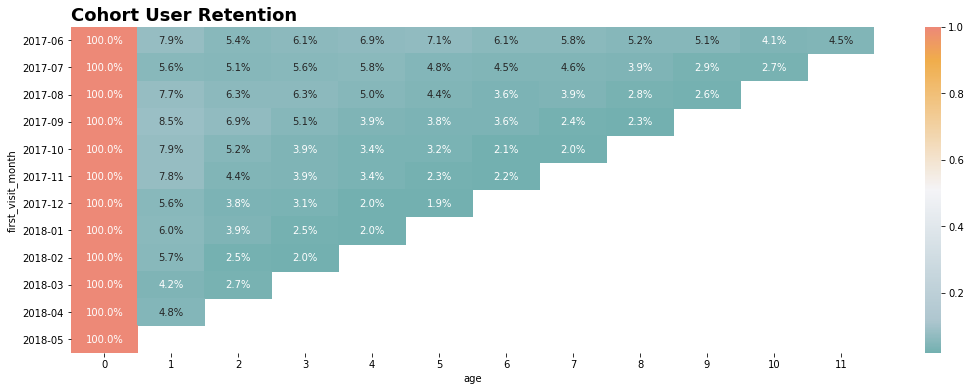

In [91]:
retention = visits_pivot.div(visits_pivot[0], axis=0)

# Visualizing the heatmap
plt.figure(figsize=(18,6))
sns.heatmap(retention ,annot=True, fmt='.1%', cmap=cm)
plt.title('Cohort User Retention', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

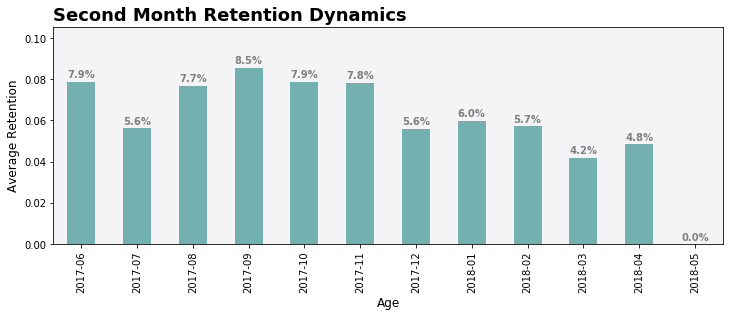

In [92]:
# Plotting the graphs
f, ax = plt.subplots(figsize=(12,4), )
retention.iloc[:,1].plot(kind='bar', color='#73B0B0', ax=ax)

# Showing bar values
for i in ax.patches:
    ax.text(i.get_x(), i.get_y() + i.get_height()+0.002,
             str(round( i.get_height()*100, 1))+'%',
             fontsize = 10, fontweight = 'bold', 
             color='grey')

# Inverting the y-axis so the scale has ascending values
#ax.invert_yaxis()

# Setting the facecolor
ax.set_facecolor('#F4F4F7')

# Setting x-axis range 
ax.axes.set_ylim(0, max(retention.iloc[:,1]+.02))

# Naming the axis labels
ax.set_xlabel('Age', fontname='tahoma', fontsize=12)
ax.set_ylabel('Average Retention', fontname='tahoma', fontsize=12)

# # Creating custom legend
# lgd_2017 = mpatches.Patch(color='#73B0B0', label='2017')
# lgd_2018 = mpatches.Patch(color='#ED8977', label='2018')
# plt.legend(handles=[lgd_2017, lgd_2018])

# Setting the plot titlwe
plt.title('Second Month Retention Dynamics', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

The second-week retention for the first six weeks shows a relatively stable trend, despite the drop in Jul-17, with at least a 7.7% rate. At the beginning of the new year, the retention rate dropped around 2 percent lower to the level between 4.2-6.0%. The end of the festive season might cause this decrease where people returned to their normal daily activities.

In [93]:
# Creating a new cohort based on source_id
cohort_source = visits.groupby(['source_id', 'first_visit_month', 'visit_month']).agg({'uid':'nunique'}).reset_index()
cohort_source['lifetime'] = cohort_source['visit_month'] - cohort_source['first_visit_month']
cohort_source['lifetime'] = cohort_source['lifetime'] / np.timedelta64(1,'M')
cohort_source['lifetime'] = cohort_source['lifetime'].round().astype('int')
cohort_source.head()

,source_id,first_visit_month,visit_month,uid,lifetime
0,1,2017-06-01,2017-06-01,972,0
1,1,2017-06-01,2017-07-01,188,1
2,1,2017-06-01,2017-08-01,126,2
3,1,2017-06-01,2017-09-01,141,3
4,1,2017-06-01,2017-10-01,156,4


In [94]:
# Creating pivot table of unique users over the span on one year
cohort_source_pivot = (cohort_source
                       .pivot_table(index=['source_id'], 
                                    columns='lifetime', 
                                    values='uid', 
                                    aggfunc='sum')
                       .fillna(0))
cohort_source_pivot

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,15227.0,1994.0,1022.0,815.0,703.0,579.0,438.0,367.0,230.0,199.0,141.0,110.0
2,21362.0,3257.0,1897.0,1507.0,1251.0,1020.0,851.0,624.0,469.0,349.0,258.0,180.0
3,68582.0,2988.0,2046.0,1821.0,1475.0,1215.0,939.0,732.0,523.0,357.0,263.0,165.0
4,75922.0,4717.0,3017.0,2324.0,1901.0,1643.0,1215.0,895.0,649.0,421.0,293.0,191.0
5,52439.0,2309.0,1391.0,1045.0,807.0,683.0,489.0,382.0,269.0,182.0,126.0,93.0
6,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,32.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,7046.0,1127.0,918.0,649.0,592.0,465.0,328.0,256.0,198.0,148.0,75.0,42.0
10,7294.0,357.0,189.0,159.0,137.0,82.0,69.0,70.0,59.0,33.0,23.0,12.0


In [95]:
# Getting the size of cohort at the 0th month
cohort_source_pivot_size = cohort_source_pivot[0]
cohort_source_pivot_size

source_id
1     15227.0
2     21362.0
3     68582.0
4     75922.0
5     52439.0
6         4.0
7        32.0
9      7046.0
10     7294.0
Name: 0, dtype: float64

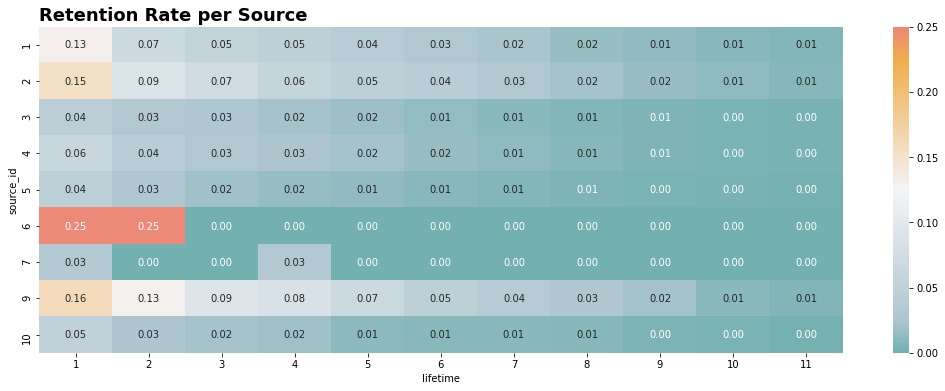

In [96]:
# Visualizing the retention rate heatmap
plt.figure(figsize=(18,6))
sns.heatmap(cohort_source_pivot
            .div(cohort_source_pivot_size, axis=0) # Dividing the cohort size every month with the size on the 0th month
            .drop(0, axis=1),
            annot=True, fmt='.2f', cmap=cm)
plt.title('Retention Rate per Source', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

The rentention rate per source are a little low, with all of them scored less than 1 percent.

### Sales: Evaluating `order` dataset<a class="anchor" id="step_3_2"></a>

In this section, we will evaluate how many visitors converted into paying customer, how long it took them to convert, and finally, the lifetime values of each cohort.

**When do people start buying?**

We can find when people start buying by the difference between the first time they visit the site and when the same user put their first order.

In [97]:
# Converting dates to a day-based type 
orders['buy_day'] = orders['buy_ts'].astype('datetime64[D]')
visits['visit_day'] = visits['start_ts'].astype('datetime64[D]')

One user might placed an order more than once. We are interested in when a user first converted,

In [98]:
# Finding when a user first visit the site
first_visit = visits.groupby('uid').agg({'visit_day':'min'}).reset_index()
first_visit.columns = ['uid','first_visit_day']
first_visit.head(3)

,uid,first_visit_day
0,11863502262781,2018-03-01
1,49537067089222,2018-02-06
2,297729379853735,2017-06-07


For the same user we find the first time when they put their first order,

In [99]:
# Finding the first time a user puts an order 
first_order = orders.groupby('uid').agg({'buy_day':'min'}).reset_index()
first_order.columns = ['uid','first_order_day']
first_order.head(3)

,uid,first_order_day
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11


Merging these two tables then calculating the difference between the `first_order_day` and `first_visit_day`

In [100]:
conversion = pd.merge(first_order, first_visit, on='uid', how='right')

conversion['difference'] = conversion['first_order_day'] - conversion['first_visit_day']
conversion['difference'] = conversion['difference']/ np.timedelta64(1, 'D')
conversion.head()

,uid,first_order_day,first_visit_day,difference
0,313578113262317,2018-01-03,2017-09-18,107.0
1,1575281904278712,2017-06-03,2017-06-03,0.0
2,2429014661409475,2017-10-11,2017-10-11,0.0
3,2464366381792757,2018-01-28,2018-01-27,1.0
4,2551852515556206,2017-11-24,2017-11-24,0.0


We can start analyzing how many visitors that converted into buying customers,

In [101]:
print('The percentage of visitors that converted is {:.1%}'.format(len(first_order)/len(first_visit)))

The percentage of visitors that converted is 16.0%


In [102]:
# Percentage of conversion time 
(conversion['difference'].value_counts()*100/len(first_order))[:5]

0.0    68.556800
1.0     5.382909
2.0     1.875530
3.0     1.237576
4.0     1.056868
5.0     0.840566
Name: difference, dtype: float64

Only 16% of visitors finally converted into buying customers, and most of them (68.5%) put their first orders at the same day as their first time visit. We can go deeper by looking the number of users that converted on day 0, 1, 7, 14, 30, 60 and so forth.

In [103]:
# Number of users per conversion days
conversion['difference'].value_counts()[:5]

0.0    25039
1.0     1966
2.0      685
3.0      452
4.0      386
5.0      307
Name: difference, dtype: int64

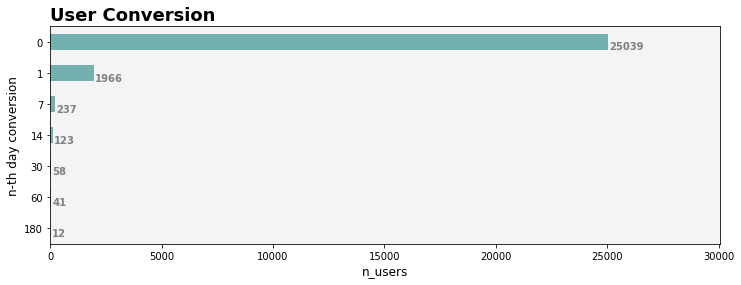

In [104]:
# Plotting the graphs
f, ax = plt.subplots(figsize=(12,4), )
conversion['difference'].value_counts()[[0, 1, 7, 14, 30, 60, 180]].plot(kind='barh', color='#73B0B0', ax=ax)


# Showing bar values
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()+50, i.get_y()+ i.get_height(),
             str(round(( i.get_width()), 2)),
             fontsize = 10, fontweight = 'bold', 
             color='grey')

# Inverting the y-axis so the scale has ascending values
ax.invert_yaxis()

# Setting the facecolor
ax.set_facecolor('#F4F4F7')

# Setting x-axis range 
ax.axes.set_xlim(0, max(conversion['difference'].value_counts().iloc[[0, 1, 7, 14, 30, 60, 180]])+5000)

# Naming the axis labels
ax.set_xlabel('n_users', fontname='tahoma', fontsize=12)
ax.set_ylabel('n-th day conversion', fontname='tahoma', fontsize=12)


# Setting the plot titlwe
plt.title('User Conversion', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

The above graph shows that 25039 users put their orders right away after their first visit. One thousand nine hundred sixty-six users waited one day before making their purchase. Similarly, 58 users came back after a month, 41 users after 60 days, and so on.

We can expand our analysis by looking at which ad source more effectively converts users. 

In [105]:
# Taking source_id from visit
conversion = conversion.merge(visits[['uid', 'source_id']], on='uid')
conversion.head()

,uid,first_order_day,first_visit_day,difference,source_id
0,313578113262317,2018-01-03,2017-09-18,107.0,2
1,313578113262317,2018-01-03,2017-09-18,107.0,2
2,313578113262317,2018-01-03,2017-09-18,107.0,2
3,1575281904278712,2017-06-03,2017-06-03,0.0,10
4,1575281904278712,2017-06-03,2017-06-03,0.0,10


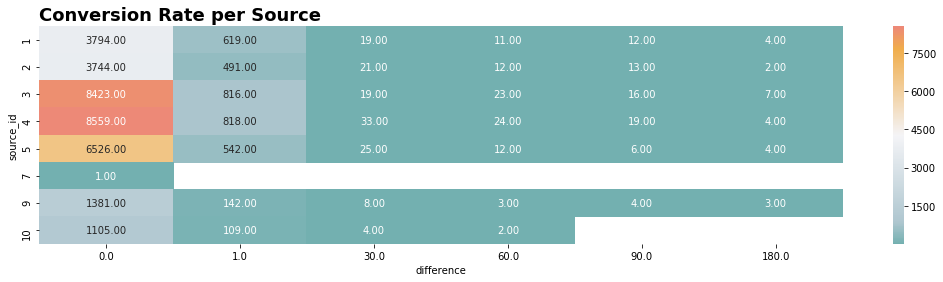

In [106]:
# Which marketing channel is the most effective
conversion_per_source = (conversion
                         .pivot_table(index='source_id', 
                                      columns='difference', 
                                      values='uid', 
                                      aggfunc='nunique'))

plt.figure(figsize=(18,4))
sns.heatmap(conversion_per_source[[0, 1, 30, 60, 90, 180]], annot=True, fmt='.2f', cmap=cm)
plt.title('Conversion Rate per Source', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

Users that came to the site from ad source #3 and #4 are the group that most converted.

We can also look at conversion rates based on cohorts. We chose to take a monthly cohorts since it is easier to visualize.

In [ ]:
# building monthly cohort
monthly_visit_cohort = visits.groupby('uid').agg({'first_visit_month':'min'}).reset_index()
monthly_visit_cohort.columns = ['uid', 'cohort_monthly']
monthly_visit_cohort.head()

Merging this to the conversion table and showing,

In [108]:
conversion = conversion.merge(monthly_visit_cohort, on='uid')
conversion.head()

,uid,first_order_day,first_visit_day,difference,source_id,cohort_monthly
0,313578113262317,2018-01-03,2017-09-18,107.0,2,2017-09-01
1,313578113262317,2018-01-03,2017-09-18,107.0,2,2017-09-01
2,313578113262317,2018-01-03,2017-09-18,107.0,2,2017-09-01
3,1575281904278712,2017-06-03,2017-06-03,0.0,10,2017-06-01
4,1575281904278712,2017-06-03,2017-06-03,0.0,10,2017-06-01


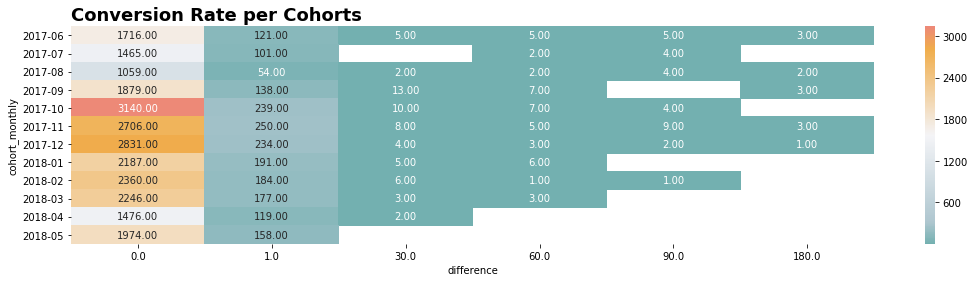

In [109]:
# Visualizeng the heatmap
conversion_per_cohort = (conversion
                         .pivot_table(index=conversion['cohort_monthly'].dt.strftime('%Y-%m'),
                                      columns='difference',
                                      values='uid',
                                      aggfunc='nunique')
                        )

plt.figure(figsize=(18,4))
sns.heatmap(conversion_per_cohort[[0, 1, 30, 60, 90, 180]], annot=True, fmt='.2f', cmap=cm)
plt.title('Conversion Rate per Cohorts', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

The heatmap shows the cohort that started at the end of the year until March the following year are the cohorts with the highest conversion rates. This might happen due to holiday seasons at the end of the year and winter and spring school breaks.

**How many orders do they make during a given period of time?**

We can evaluate the number of orders by counting every `buy_ts` entry for each user `uid`. Later on we are also interested in how large is the order size,

In [110]:
# Getting 'uid' and 'source_id' from orders and merge them into orders
orders_ = pd.merge(orders, visits[['uid', 'source_id']], on='uid')

# Creating buy day based on month
orders_['buy_month'] = orders_['buy_ts'].astype('datetime64[M]')

# Finding the first time each user puts an order
first_orders_month = orders_.groupby('uid').agg({'buy_month':'min'}).reset_index()
first_orders_month.columns = ['uid', 'cohort_monthly']
first_orders_month.head()

# Merging 'first_order_month' into 'orders' dataframe
orders_ = orders_.merge(first_orders_month, on='uid')

# Calculating age of each cohort
orders_['age'] = orders_['buy_month'] - orders_['cohort_monthly']
orders_['age'] = orders_['age']/ np.timedelta64(1, 'M')
orders_['age'] = orders_['age'].round().astype('int')

# Showing 'orders' dataframe
display(orders_.head())

,buy_ts,revenue,uid,buy_day,source_id,buy_month,cohort_monthly,age
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3,2017-06-01,2017-06-01,0


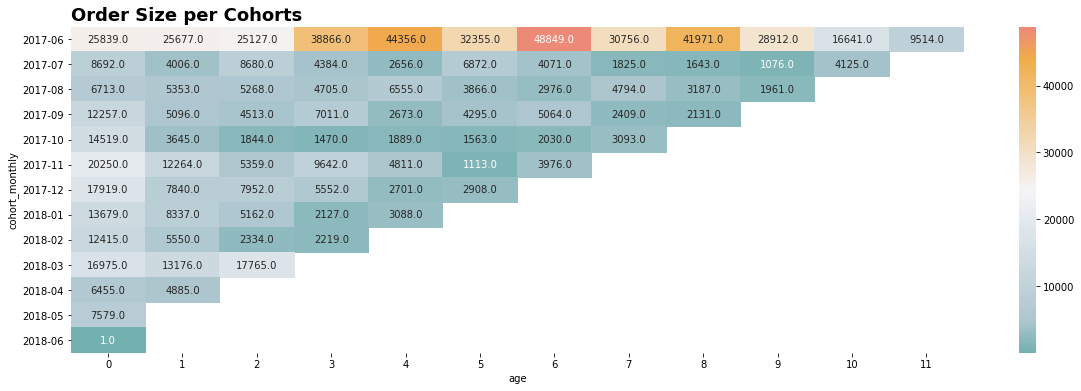

In [111]:
# Viewing a heatmap per cohort
plt.figure(figsize=(20,6))
sns.heatmap(orders_.pivot_table(index=orders_['cohort_monthly'].dt.strftime('%Y-%m'),\
                               columns='age',\
                               values='buy_ts', aggfunc='count'),\
                               annot=True, fmt='.1f', cmap=cm)

plt.title('Order Size per Cohorts', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

The first cohort performed very well through their lifetime, where they put more order at the 3rd to 8th week. Another similarly functioning cohort is the one who ordered on March 18. However, we don't have enough data yet regarding this cohort. The cohort from Oct-17 to Dec-17 also put a relatively high initial order, although not all of them performed the same way as the Jun-17 cohort. This indicates that we need to focus on the marketing campaigns during this period since the users who put their first order will be the most profitable. 

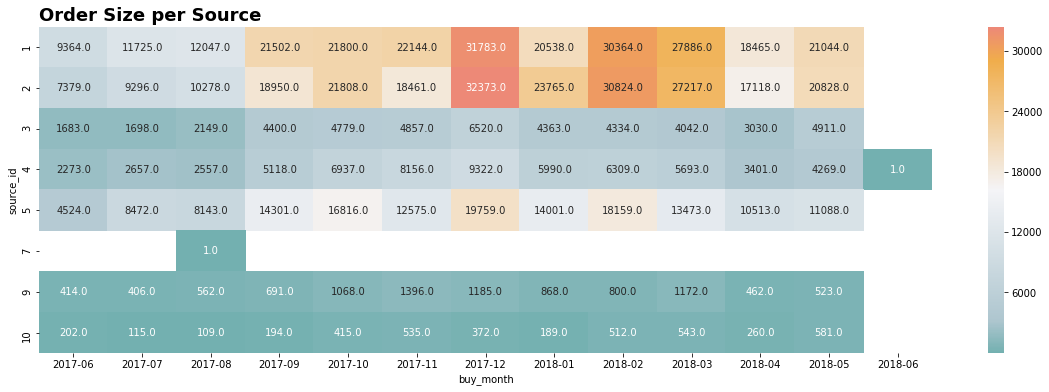

In [112]:
# Order size per source
plt.figure(figsize=(20,6))
sns.heatmap(orders_.pivot_table(index=orders_['source_id'],\
                               columns=orders_['buy_month'].dt.strftime('%Y-%m'),\
                               values='buy_ts', aggfunc='count'),\
                               annot=True, fmt='.1f', cmap=cm)

plt.title('Order Size per Source', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

Previously, we found that ad sources #3 and #4 motivate users to convert the most. However, in the heatmap above, we see that ad source #1 and #2 pushed users to make the most significant number of orders.

In [113]:
# Calculating number of purchase per customer
(print('The average order per customer is {:.2f}'
       .format(orders.groupby('uid').count()['buy_ts'].sum()/ 
               orders.groupby('uid').count()['buy_ts'].shape[0])))
      

The average order per customer is 1.38


In [114]:
# Extracting datetime64 information
orders['day'] = orders['buy_day'].dt.day
orders['week'] = orders['buy_day'].dt.week
orders['month'] = orders['buy_day'].dt.month
orders['year'] = orders['buy_day'].dt.year
orders.head()

,buy_ts,revenue,uid,buy_day,day,week,month,year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1,22,6,2017
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,1,22,6,2017
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,1,22,6,2017
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,1,22,6,2017
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,1,22,6,2017


In [115]:
# Calculating total daily orders
daily_orders = orders.groupby(['year', 'month', 'day']).count()['buy_ts'].reset_index()
daily_orders.head(3)

,year,month,day,buy_ts
0,2017,6,1,96
1,2017,6,2,111
2,2017,6,3,67


In [116]:
# Calculating number of daily unique buyers
daily_unique_users = orders.groupby(['year', 'month', 'day']).agg({'uid':'nunique'}).reset_index()
daily_unique_users.head(3)

,year,month,day,uid
0,2017,6,1,86
1,2017,6,2,101
2,2017,6,3,61


In [117]:
# Merging two dataframes
daily_order_rate = daily_orders.merge(daily_unique_users, on=['year', 'month', 'day'])
daily_order_rate.head(3)

,year,month,day,buy_ts,uid
0,2017,6,1,96,86
1,2017,6,2,111,101
2,2017,6,3,67,61


In [118]:
# Calculating daily average order per customer
daily_order_rate['daily_rate'] = daily_order_rate['buy_ts']/daily_order_rate['uid']
daily_order_rate.head(3)

,year,month,day,buy_ts,uid,daily_rate
0,2017,6,1,96,86,1.116279
1,2017,6,2,111,101,1.099010
2,2017,6,3,67,61,1.098361


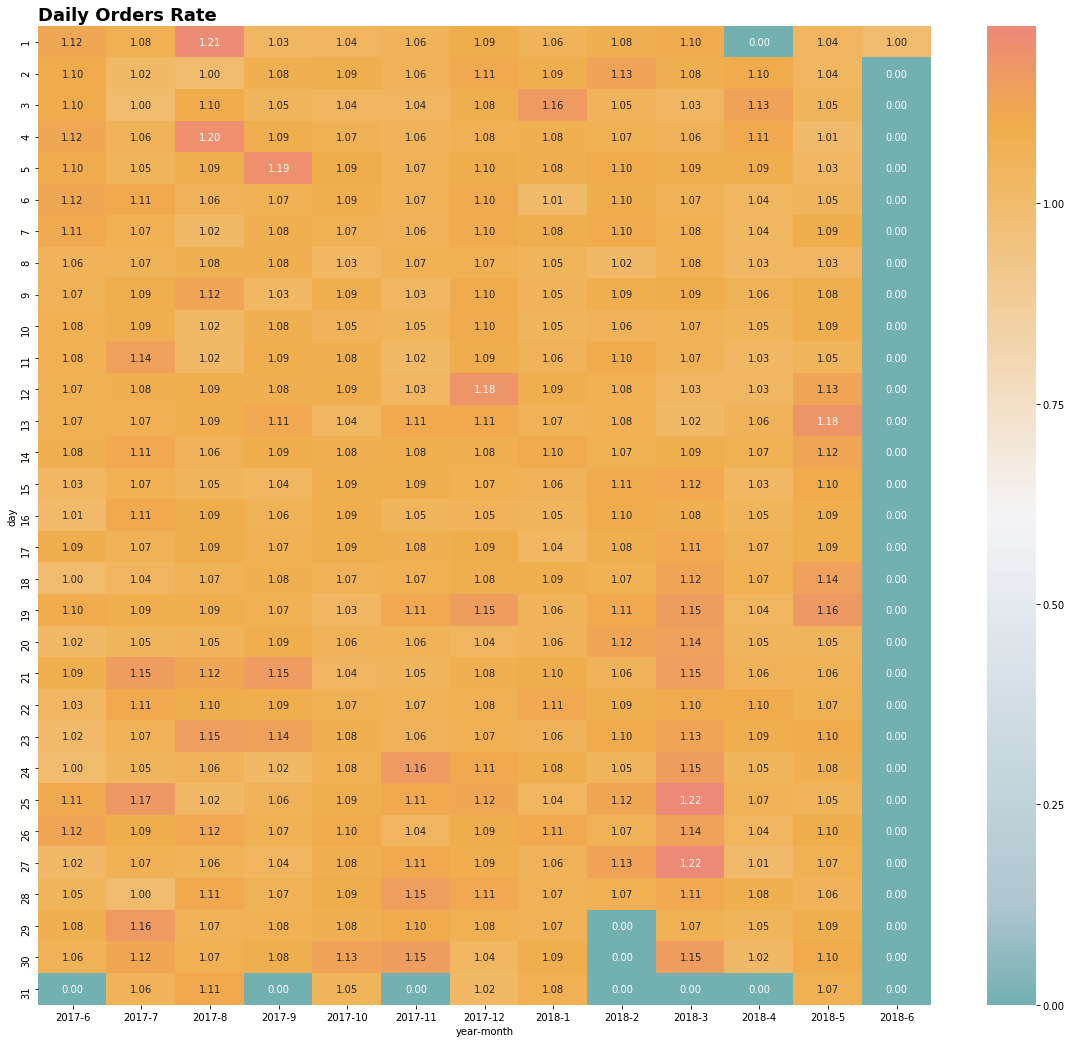

In [119]:
# Visualizing average daily order
plt.figure(figsize=(20,18))
sns.heatmap((daily_order_rate
             .pivot_table(index='day', 
                          columns=['year', 'month'], 
                          values='daily_rate', aggfunc='mean')
             .fillna(0)),
            annot=True, fmt='.2f', cmap=cm)

plt.title('Daily Orders Rate', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()


The daily heatmap shows that daily orders are usually at around 1.08-1.10 rate. However, there are days that the rate increased to above 1.20 in August-17 and  March-18.

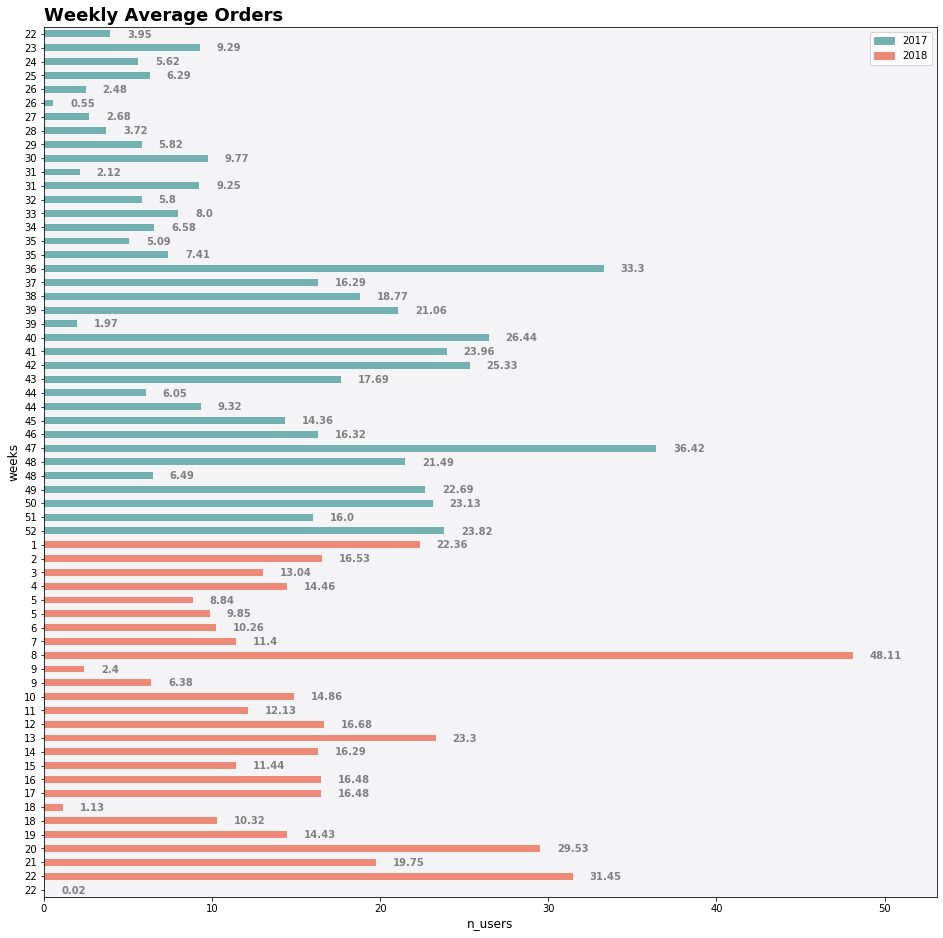

In [120]:
# Calculating and visualizing weekly order rates

# Calculating total weekly orders
weekly_orders = orders.groupby(['year', 'month', 'week']).count()['buy_ts'].reset_index()

# Calculating weekly unique users
weekly_unique_users = orders.groupby(['year', 'month', 'week']).agg({'uid':'nunique'}).reset_index()

# Merging two datasets
weekly_order_rate = weekly_orders.merge(weekly_unique_users, on=['year', 'month', 'week'])

# Calculating the weekly rate
weekly_order_rate['weekly_rate'] = weekly_order_rate['buy_ts']/daily_order_rate['uid']


# Plotting the graph
# Assigning colors on different years for visualization
weekly_order_rate['color'] = ['#73B0B0' if x == 2017 else '#ED8977' for x in weekly_order_rate.year]

# Plotting the graphs
f, ax = plt.subplots(figsize=(16,16), )
weekly_order_rate.set_index('week')['weekly_rate'].plot(kind='barh', color=weekly_order_rate.color.values, ax=ax)

# Showing bar values
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()+1, i.get_y()+ i.get_height(),
             str(round(( i.get_width()), 2)),
             fontsize = 10, fontweight = 'bold', 
             color='grey')

# Inverting the y-axis so the scale has ascending values
ax.invert_yaxis()

# Setting the facecolor
ax.set_facecolor('#F4F4F7')

# Setting x-axis range 
ax.axes.set_xlim(0, max(weekly_order_rate.weekly_rate)+5)

# Naming the axis labels
ax.set_xlabel('n_users', fontname='tahoma', fontsize=12)
ax.set_ylabel('weeks', fontname='tahoma', fontsize=12)

# Creating custom legend
lgd_2017 = mpatches.Patch(color='#73B0B0', label='2017')
lgd_2018 = mpatches.Patch(color='#ED8977', label='2018')
plt.legend(handles=[lgd_2017, lgd_2018])

# Setting the plot titlwe
plt.title('Weekly Average Orders', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

The weekly heatmap shows the peak, 48.11 orders per customer at the 8th week of 2018. That occurred at Feb 19-25, 18.

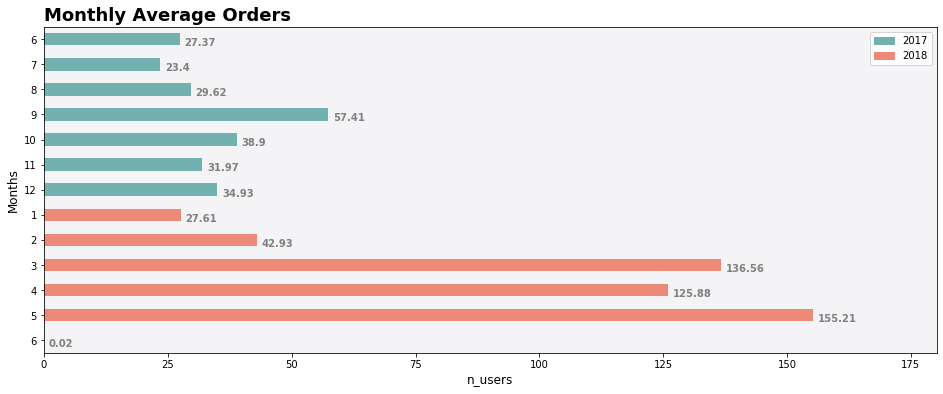

In [121]:
# Calculating and visualizing monthly order rates

# Calculating total monthly orders
monthly_orders = orders.groupby(['year', 'month']).count()['buy_ts'].reset_index()

# Calculating monthly unique users
monthly_unique_users = orders.groupby(['year', 'month']).agg({'uid':'nunique'}).reset_index()

# Merging two datasets
monthly_order_rate = monthly_orders.merge(monthly_unique_users, on=['year', 'month'])

# Calculating the weekly rate
monthly_order_rate['monthly_rate'] = monthly_order_rate['buy_ts']/daily_order_rate['uid']


# Plotting the graph
# Assigning colors on different years for visualization
monthly_order_rate['color'] = ['#73B0B0' if x == 2017 else '#ED8977' for x in monthly_order_rate.year]

# Plotting the graphs
f, ax = plt.subplots(figsize=(16,6), )
monthly_order_rate.set_index('month')['monthly_rate'].plot(kind='barh', color=monthly_order_rate.color.values, ax=ax)

# Showing bar values
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()+1, i.get_y()+ i.get_height(),
             str(round(( i.get_width()), 2)),
             fontsize = 10, fontweight = 'bold', 
             color='grey')

# Inverting the y-axis so the scale has ascending values
ax.invert_yaxis()

# Setting the facecolor
ax.set_facecolor('#F4F4F7')

# Setting x-axis range 
ax.axes.set_xlim(0, max(monthly_order_rate.monthly_rate)+25)

# Naming the axis labels
ax.set_xlabel('n_users', fontname='tahoma', fontsize=12)
ax.set_ylabel('Months', fontname='tahoma', fontsize=12)

# Creating custom legend
lgd_2017 = mpatches.Patch(color='#73B0B0', label='2017')
lgd_2018 = mpatches.Patch(color='#ED8977', label='2018')
plt.legend(handles=[lgd_2017, lgd_2018])

# Setting the plot titlwe
plt.title('Monthly Average Orders', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

The above heatmap shows that the month with highest orders per customer is May-18

## **What is the average purchase size?**

Previously we saw the size of orders different cohort produce. Now we will find how much revenue each cohort generated.

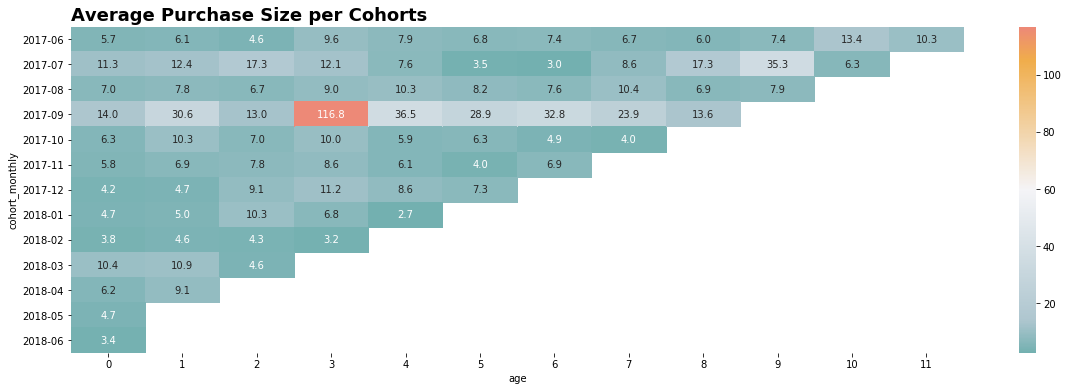

In [122]:
# Revenue per cohort
plt.figure(figsize=(20,6))
sns.heatmap(orders_.pivot_table(index=orders_['cohort_monthly'].dt.strftime('%Y-%m'),\
                               columns='age',\
                               values='revenue', aggfunc='mean'),\
                               annot=True, fmt='.1f', cmap=cm)

plt.title('Average Purchase Size per Cohorts', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

If we evaluate based on the revenue, we found that the November 17 cohort consistently generated relatively high revenue than others, specifically on their third month, they score considerable revenue with 116.8.

In [123]:
orders_.pivot_table(index=orders_['cohort_monthly'].dt.strftime('%Y-%m'),\
                               columns=orders_['buy_month'].dt.strftime('%Y-%m'),\
                               values='revenue', aggfunc='mean').mean(axis=1)

cohort_monthly
2017-06     7.660419
2017-07    12.238762
2017-08     8.183504
2017-09    34.461615
2017-10     6.837285
2017-11     6.594523
2017-12     7.548621
2018-01     5.891226
2018-02     3.967963
2018-03     8.615603
2018-04     7.638963
2018-05     4.697291
2018-06     3.420000
dtype: float64

Cohort Sep-17 produced the largest purchase size with USD34, followed by the Jul-17 cohortUSD12.

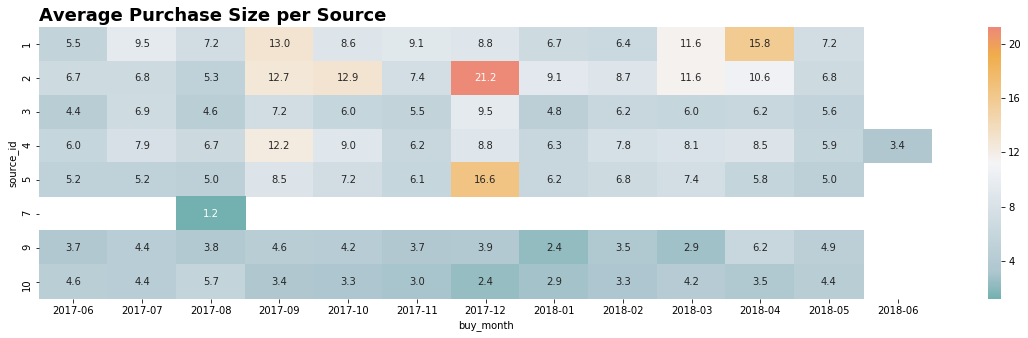

In [124]:
# Revenue per source
plt.figure(figsize=(20,5))
sns.heatmap(orders_.pivot_table(index=orders_['source_id'],\
                               columns=orders_['buy_month'].dt.strftime('%Y-%m'),\
                               values='revenue', aggfunc='mean'),\
                               annot=True, fmt='.1f', cmap=cm)

plt.title('Average Purchase Size per Source', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

The heatmap shows that the revenue of ad source #2 in December 2017 increased drastically to almost 3 times the month before from 7.4 to 21.2. The same trend also happened on ad source #3 from 6.1 to 16.6.

In [125]:
orders_.pivot_table(index=orders_['source_id'],\
                               columns=orders_['buy_month'].dt.strftime('%Y-%m'),\
                               values='revenue', aggfunc='mean').mean(axis=1)

source_id
1     9.121313
2     9.997488
3     6.084090
4     7.446608
5     7.076858
7     1.220000
9     3.989034
10    3.768959
dtype: float64

On average, ad source #1 and #2 have the most significant revenue by scoring more than USD9.

In [126]:
print('The total revenue is {}'.format(orders['revenue'].sum()))
print('The average revenue is {:.2f}'.format(orders['revenue'].mean()))

The total revenue is 252057.19999999998
The average revenue is 5.00


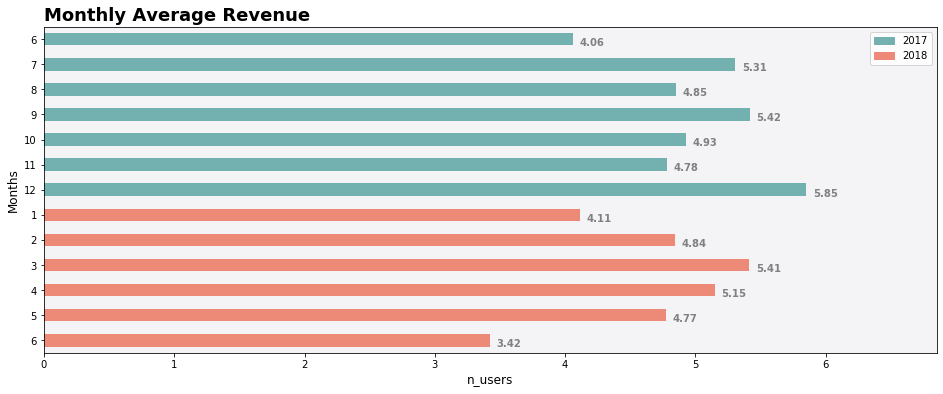

In [127]:
# Plotting monthly revenue
average_revenue = orders.groupby(['year','month']).mean()['revenue'].reset_index()

# Assigning colors on different years for visualization
average_revenue['color'] = ['#73B0B0' if x == 2017 else '#ED8977' for x in average_revenue.year]

# Plotting the graphs
f, ax = plt.subplots(figsize=(16,6), )
average_revenue.set_index('month')['revenue'].plot(kind='barh', color=average_revenue.color.values, ax=ax)

# Showing bar values
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()+0.05, i.get_y()+ i.get_height(),
             str(round(( i.get_width()), 2)),
             fontsize = 10, fontweight = 'bold', 
             color='grey')

# Inverting the y-axis so the scale has ascending values
ax.invert_yaxis()

# Setting the facecolor
ax.set_facecolor('#F4F4F7')

# Setting x-axis range 
ax.axes.set_xlim(0, max(average_revenue.revenue)+1)

# Naming the axis labels
ax.set_xlabel('n_users', fontname='tahoma', fontsize=12)
ax.set_ylabel('Months', fontname='tahoma', fontsize=12)

# Creating custom legend
lgd_2017 = mpatches.Patch(color='#73B0B0', label='2017')
lgd_2018 = mpatches.Patch(color='#ED8977', label='2018')
plt.legend(handles=[lgd_2017, lgd_2018])

# Setting the plot titlwe
plt.title('Monthly Average Revenue', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

The above heatmap shows a relatively stable average revenues. The highest revenue is on Dec-17 which is obviously due to end-of-year holidays.

**Lifetime Value**

Finally the lifetime value (LTV) is calculated by dividing the revenue with the size of each cohort.

Finding the first time a customer made an order,

In [136]:
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')

first_orders = orders.groupby(['uid']).agg({'buy_month':'min'}).reset_index()
first_orders.columns = ['uid', 'first_buy_month']
first_orders.head()

,uid,first_buy_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


Calculating the cohort size,

In [137]:
cohort_size = first_orders.groupby('first_buy_month').agg({'uid':'count'}).reset_index()
cohort_size.columns = ['first_buy_month', 'n_user']
cohort_size.head()

,first_buy_month,n_user
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Merging first_orders into dataframe,

In [138]:
orders = orders.merge(first_orders, on='uid')
orders.head()

,buy_ts,revenue,uid,buy_day,day,week,month,year,buy_month,first_buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1,22,6,2017,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,1,22,6,2017,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,1,22,6,2017,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,1,22,6,2017,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,1,22,6,2017,2017-06-01,2017-06-01


Creating cohorts,

In [139]:
cohort_order = orders.groupby(['first_buy_month', 'buy_month']).agg({'revenue':'sum'}).reset_index()
cohort_order.head()

,first_buy_month,buy_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Merging the cohort sizes into the cohort dataframe,

In [140]:
cohort_order = cohort_order.merge(cohort_size, on='first_buy_month')
cohort_order.head()

,first_buy_month,buy_month,revenue,n_user
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,2023
2,2017-06-01,2017-08-01,885.34,2023
3,2017-06-01,2017-09-01,1931.30,2023
4,2017-06-01,2017-10-01,2068.58,2023


Calculating the Gross Profit--we assume the profit margin is 50%, then calculating the cohort age,

In [141]:
cohort_order['gp'] = cohort_order['revenue'] * 0.5

cohort_order['lifetime'] = cohort_order['buy_month'] - cohort_order['first_buy_month']
cohort_order['lifetime'] = cohort_order['lifetime']/ np.timedelta64(1, 'M')
cohort_order['lifetime'] = cohort_order['lifetime'].round().astype('int')

cohort_order.head()

,first_buy_month,buy_month,revenue,n_user,gp,lifetime
0,2017-06-01,2017-06-01,9557.49,2023,4778.745,0
1,2017-06-01,2017-07-01,981.82,2023,490.910,1
2,2017-06-01,2017-08-01,885.34,2023,442.670,2
3,2017-06-01,2017-09-01,1931.30,2023,965.650,3
4,2017-06-01,2017-10-01,2068.58,2023,1034.290,4


Calculating the lifetime value (LTV),

In [142]:
cohort_order['ltv'] = cohort_order['gp']/cohort_order['n_user']
cohort_order.head()

,first_buy_month,buy_month,revenue,n_user,gp,lifetime,ltv
0,2017-06-01,2017-06-01,9557.49,2023,4778.745,0,2.362207
1,2017-06-01,2017-07-01,981.82,2023,490.910,1,0.242664
2,2017-06-01,2017-08-01,885.34,2023,442.670,2,0.218819
3,2017-06-01,2017-09-01,1931.30,2023,965.650,3,0.477336
4,2017-06-01,2017-10-01,2068.58,2023,1034.290,4,0.511265


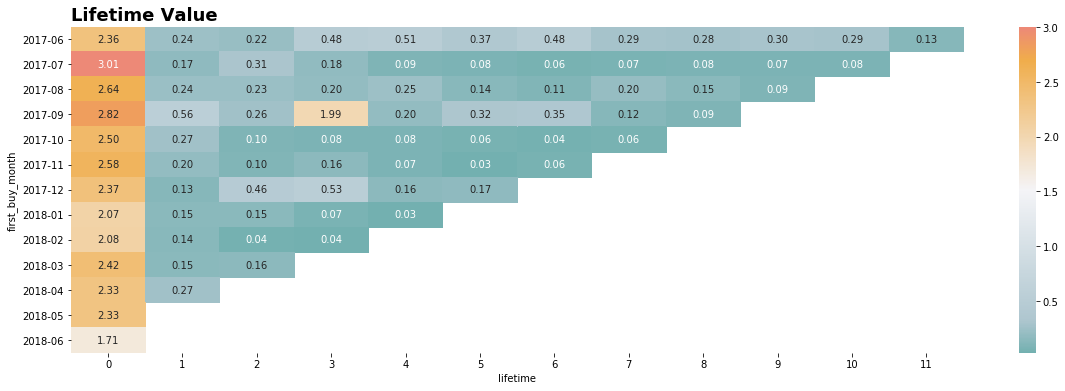

In [143]:
# Creating the heatmap for LTV
plt.figure(figsize=(20,6))
sns.heatmap(cohort_order.pivot_table(index=cohort_order['first_buy_month'].dt.strftime('%Y-%m'),
                         columns='lifetime',
                         values='ltv',
                         aggfunc='mean'),
            annot=True, fmt='.2f', cmap=cm)

plt.title('Lifetime Value', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

Calculating the cumulative LTV,

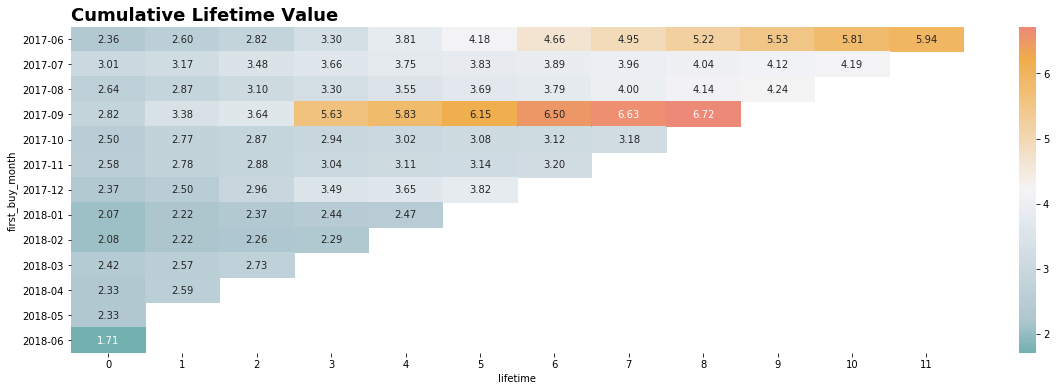

In [144]:
plt.figure(figsize=(20,6))
sns.heatmap(cohort_order.pivot_table(index=cohort_order['first_buy_month'].dt.strftime('%Y-%m'),
                         columns='lifetime',
                         values='ltv',
                         aggfunc='mean').cumsum(axis=1),
            annot=True, fmt='.2f', cmap=cm)

plt.title('Cumulative Lifetime Value', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

The cumulative LTV shows that cohort Jun-17 and Sep-17 have the highest score. It means users on each cohort brought 5.94 and 6.72 revenues respectively.

We can also calculate LTV per source,

In [145]:
# Grouping the revenue based on the source 
source_revenue = orders_.groupby(['source_id','buy_month']).sum()['revenue'].reset_index()
source_revenue.head(3)

,source_id,buy_month,revenue
0,1,2017-06-01,51524.95
1,1,2017-07-01,111710.63
2,1,2017-08-01,86273.21


In [146]:
# Calculating the gross profit per source with the assumption a profit margin equals to 50%
source_revenue['gp'] = source_revenue['revenue'] * 0.5
source_revenue.head(3)

,source_id,buy_month,revenue,gp
0,1,2017-06-01,51524.95,25762.475
1,1,2017-07-01,111710.63,55855.315
2,1,2017-08-01,86273.21,43136.605


Finding the size of each ad source,

In [147]:
# Finding the source size
source_size = orders_.groupby(['source_id']).agg({'uid':'nunique'})
source_size.columns = ['n_size']
source_size.head(3)

,n_size
source_id,
1,7138
2,7305
3,13846


In [148]:
# Merging source revenue and the size
ltv_source = pd.merge(source_revenue, source_size, on='source_id')
ltv_source.head(3)

,source_id,buy_month,revenue,gp,n_size
0,1,2017-06-01,51524.95,25762.475,7138
1,1,2017-07-01,111710.63,55855.315,7138
2,1,2017-08-01,86273.21,43136.605,7138


Then calculating LTV per source,

In [149]:
ltv_source['ltv'] = ltv_source['gp'] / ltv_source['n_size']
ltv_source.head(3)

,source_id,buy_month,revenue,gp,n_size,ltv
0,1,2017-06-01,51524.95,25762.475,7138,3.609201
1,1,2017-07-01,111710.63,55855.315,7138,7.825065
2,1,2017-08-01,86273.21,43136.605,7138,6.043234


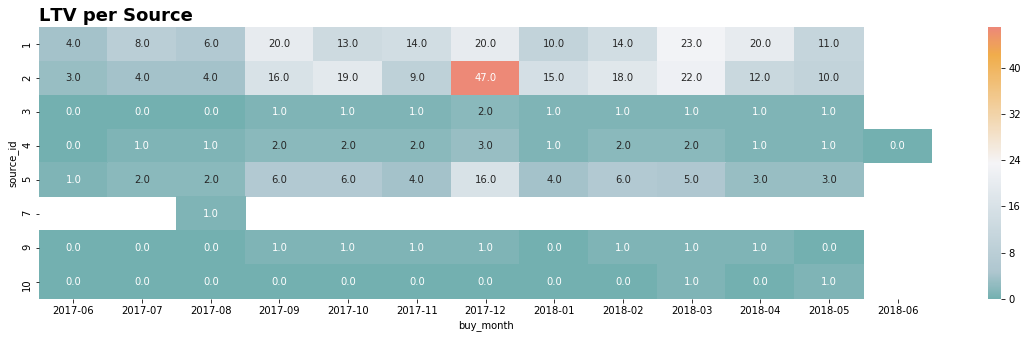

In [150]:
ltv_source_pivot = ltv_source.pivot_table(index='source_id',\
                   columns=ltv_source['buy_month'].dt.strftime('%Y-%m'),\
                   values= 'ltv',
                   aggfunc='mean').round()

plt.figure(figsize=(20,5))
sns.heatmap(ltv_source_pivot, annot=True, cmap=cm, fmt='.1f')

plt.title('LTV per Source', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

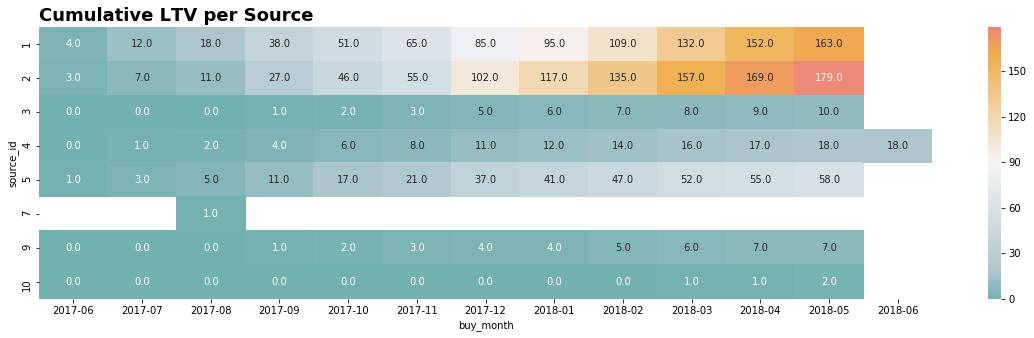

In [151]:
ltv_source_pivot = ltv_source.pivot_table(index='source_id',\
                   columns=ltv_source['buy_month'].dt.strftime('%Y-%m'),\
                   values= 'ltv',
                   aggfunc='mean').round().cumsum(axis=1)

plt.figure(figsize=(20,5))
sns.heatmap(ltv_source_pivot, annot=True, cmap=cm, fmt='.1f')

plt.title('Cumulative LTV per Source', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

In [152]:
ltv_source_pivot.sum(axis=1)

source_id
1      924.0
2     1008.0
3       51.0
4      127.0
5      348.0
7        1.0
9       39.0
10       4.0
dtype: float64

Ad source #1 and #2 bring the most revenue with USD320 and USD363 per user, respectively. There was also a peak on source #2 in Dec-2017, where the LTV was USD94 per user.

### Marketing: Evaluating `costs` dataset<a class="anchor" id="step_3_3"></a>

Now we will evaluate how the marketing strategy has been performing. We will see how much money is spent on marketing campaigns, either in general or over time for each ad source. Then we will see how effective the marketing campaign has been by calculating the Customer Acquisition Cost. Lastly, we will compare the LTV and CAC to decide which ad surce is the best investment choice.

**How much money was spent? Overall/per source/over time**

Before start the analysis, we convert the date, `dt` into a monthly-basis,

In [153]:
# Converting the date into monthly-based 
costs['dt_month'] = costs['dt'].astype('datetime64[M]') 
costs['dt_month_str'] = costs['dt_month'].dt.strftime('%Y-%m')

Evaluating the cost spent every month,

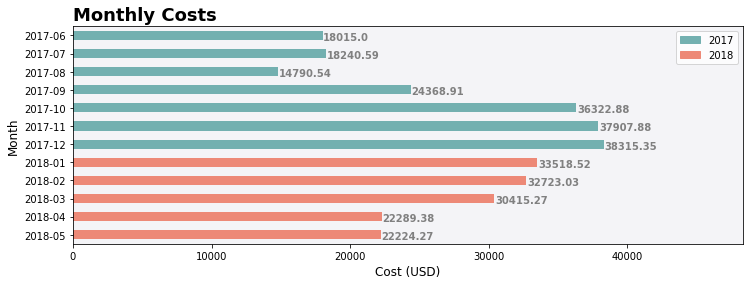

In [154]:
# Finding the cost per month
cost_by_month = costs.groupby('dt_month_str').sum()

# Assigning colors on different years for visualization
cost_by_month['color'] = ['#73B0B0' if x[0] == '2017' else '#ED8977' \
                          for x in cost_by_month.reset_index()['dt_month_str'].str.split('-')]
# Plotting the graphs
f, ax = plt.subplots(figsize=(12,4), )
cost_by_month['costs'].plot(kind='barh', color=cost_by_month['color'].values, ax=ax)

# Showing bar values
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()+50, i.get_y()+ i.get_height(),
             str(round(( i.get_width()), 2)),
             fontsize = 10, fontweight = 'bold', 
             color='grey')

# Inverting the y-axis so the scale has ascending values
ax.invert_yaxis()

# Setting the facecolor
ax.set_facecolor('#F4F4F7')

# Setting x-axis range 
ax.axes.set_xlim(0, max(cost_by_month.costs)+10000)

# Naming the axis labels
ax.set_xlabel('Cost (USD)', fontname='tahoma', fontsize=12)
ax.set_ylabel('Month', fontname='tahoma', fontsize=12)

# Creating custom legend
lgd_2017 = mpatches.Patch(color='#73B0B0', label='2017')
lgd_2018 = mpatches.Patch(color='#ED8977', label='2018')
plt.legend(handles=[lgd_2017, lgd_2018])

# Setting the plot titlwe
plt.title('Monthly Costs', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

In [155]:
print('The overall marketing cost in a year is USD{:.1f}'.format(cost_by_month['costs'].sum()))

The overall marketing cost in a year is USD329131.6


We can see above the marketing cost spent for each month. The overall cost for the whole year is USD329,131. The highest expenses paid were on October, November, and December, possibly to anticipate autumn and winter school breaks, as well as the Black Friday, Christmas, and New Year holidays.

We can also find the total expense paid for marketing on each channel,

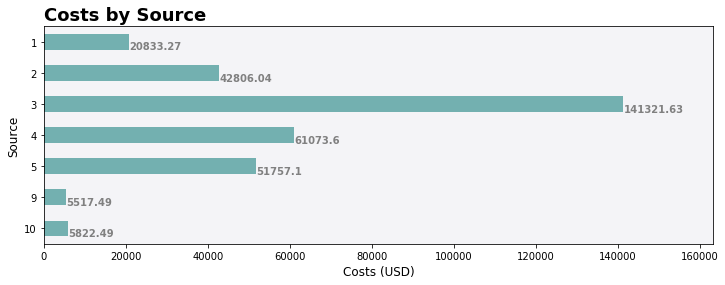

In [156]:
# Grouping by `source_id` to get the sum of `costs`
cost_by_source = costs.groupby('source_id').sum()

# Plotting the graphs
f, ax = plt.subplots(figsize=(12,4), )
cost_by_source['costs'].plot(kind='barh', color='#73B0B0', ax=ax)

# Showing bar values
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()+50, i.get_y()+ i.get_height(),
             str(round(( i.get_width()), 2)),
             fontsize = 10, fontweight = 'bold', 
             color='grey')

# Inverting the y-axis so the scale has ascending values
ax.invert_yaxis()

# Setting the facecolor
ax.set_facecolor('#F4F4F7')

# Setting x-axis range 
ax.axes.set_xlim(0, max(cost_by_month.costs)+125000)

# Naming the axis labels
ax.set_xlabel('Costs (USD)', fontname='tahoma', fontsize=12)
ax.set_ylabel('Source', fontname='tahoma', fontsize=12)

# Setting the plot titlwe
plt.title('Costs by Source', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

In [157]:
# The proportion of the marketing costs of each source over the total costs
cost_by_source/cost_by_month['costs'].sum()

,costs
source_id,
1,0.063298
2,0.130058
3,0.429377
4,0.185560
5,0.157254
9,0.016764
10,0.017690


We paid USD141,321 on source #3, almost double the amount of money spent on other channels and take almost 43% of the marketing expenses. On the other hand, we only spent USD5500-5800 on source #9, #10.

We can see how the budget were used every month below,

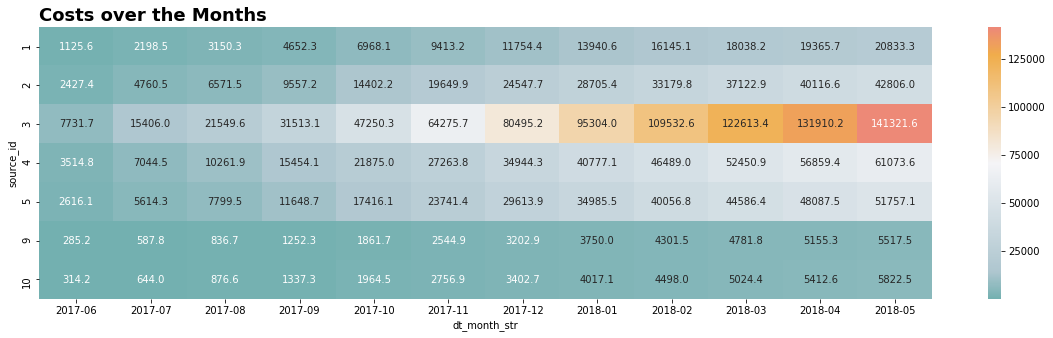

In [158]:
plt.figure(figsize=(20,5))
sns.heatmap(costs
            .pivot_table(index='source_id', 
                         columns='dt_month_str', 
                         values='costs', aggfunc='sum')
            .cumsum(axis=1), 
            annot=True, cmap=cm, fmt='.1f')

plt.title('Costs over the Months', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

On this chart, we can see the growth of costs for different source_id. Here we can see that source #3 consistently requires high costs

**How much did customer acquisition from each of the sources cost?**

The Customer Acquisition Cost tells us how much we need to spend marketing budget to get a single customer. The value is the ratio between marketing costs and the number of customers who made an order over the same period. 

We can find the monthly costs per source_id below,

In [159]:
costs_per_source = costs.groupby(['source_id']).sum().reset_index()
costs_per_source.head(3)

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63


Then, finding the number of customers who put an order based on the source they came from,

In [160]:
conversion_per_source = conversion.groupby('source_id').count()['uid'].reset_index()
conversion_per_source.columns = ['source_id', 'n_user']
conversion_per_source.head(3)

,source_id,n_user
0,1,34121
1,2,47626
2,3,85610


In [161]:
cac_source = pd.merge(costs_per_source, conversion_per_source, on='source_id')
cac_source.head(3)

,source_id,costs,n_user
0,1,20833.27,34121
1,2,42806.04,47626
2,3,141321.63,85610


In [162]:
cac_source['cac'] = cac_source['costs']/cac_source['n_user']
cac_source = cac_source.set_index('source_id')
cac_source.head(3)

,costs,n_user,cac
source_id,,,
1,20833.27,34121,0.610570
2,42806.04,47626,0.898796
3,141321.63,85610,1.650761


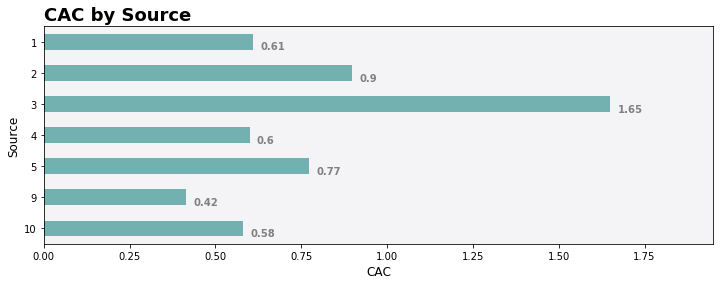

In [163]:
# Plotting the graphs
f, ax = plt.subplots(figsize=(12,4), )
cac_source['cac'].plot(kind='barh', color='#73B0B0', ax=ax)

# Showing bar values
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()+0.02, i.get_y()+ i.get_height(),
             str(round(( i.get_width()), 2)),
             fontsize = 10, fontweight = 'bold', 
             color='grey')

# Inverting the y-axis so the scale has ascending values
ax.invert_yaxis()

# Setting the facecolor
ax.set_facecolor('#F4F4F7')

# Setting x-axis range 
ax.axes.set_xlim(0, max(cac_source.cac)+0.3)

# Naming the axis labels
ax.set_xlabel('CAC', fontname='tahoma', fontsize=12)
ax.set_ylabel('Source', fontname='tahoma', fontsize=12)

# Setting the plot titlwe
plt.title('CAC by Source', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

From the chart above, we see that ad source #3 has the highest CAC. We need to spend USD3 to get a single customer. The most effective channel is source #1, where we need only to pay less than 1 cent to attract new customer.

Previously we have calculated the LTV and kept it in the cohort_order table. .We are going to use the same table to keep the CAC.

In [164]:
cohort_order.head()

,first_buy_month,buy_month,revenue,n_user,gp,lifetime,ltv
0,2017-06-01,2017-06-01,9557.49,2023,4778.745,0,2.362207
1,2017-06-01,2017-07-01,981.82,2023,490.910,1,0.242664
2,2017-06-01,2017-08-01,885.34,2023,442.670,2,0.218819
3,2017-06-01,2017-09-01,1931.30,2023,965.650,3,0.477336
4,2017-06-01,2017-10-01,2068.58,2023,1034.290,4,0.511265


Calculating total costs per month,

In [165]:
costs

,source_id,dt,costs,dt_month,dt_month_str
0,1,2017-06-01,75.20,2017-06-01,2017-06
1,1,2017-06-02,62.25,2017-06-01,2017-06
2,1,2017-06-03,36.53,2017-06-01,2017-06
3,1,2017-06-04,55.00,2017-06-01,2017-06
4,1,2017-06-05,57.08,2017-06-01,2017-06
...,...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01,2018-05
2538,10,2018-05-28,21.26,2018-05-01,2018-05
2539,10,2018-05-29,11.32,2018-05-01,2018-05
2540,10,2018-05-30,33.15,2018-05-01,2018-05


In [166]:
costs_per_month = costs.groupby('dt_month').sum()['costs'].reset_index()
costs_per_month.columns = ['buy_month', 'costs']
costs_per_month.head()

,buy_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


Merging the cohort size with the cost per month,

In [167]:
cohort_order = cohort_order.merge(costs_per_month, on='buy_month')
cohort_order.head()

,first_buy_month,buy_month,revenue,n_user,gp,lifetime,ltv,costs
0,2017-06-01,2017-06-01,9557.49,2023,4778.745,0,2.362207,18015.00
1,2017-06-01,2017-07-01,981.82,2023,490.910,1,0.242664,18240.59
2,2017-07-01,2017-07-01,11557.65,1923,5778.825,0,3.005109,18240.59
3,2017-06-01,2017-08-01,885.34,2023,442.670,2,0.218819,14790.54
4,2017-07-01,2017-08-01,644.61,1923,322.305,1,0.167605,14790.54


Calculating the Customer Acquisition Cost,

In [168]:
cohort_order['cac'] = cohort_order['costs']/cohort_order['n_user']
cohort_order.head()

,first_buy_month,buy_month,revenue,n_user,gp,lifetime,ltv,costs,cac
0,2017-06-01,2017-06-01,9557.49,2023,4778.745,0,2.362207,18015.00,8.905091
1,2017-06-01,2017-07-01,981.82,2023,490.910,1,0.242664,18240.59,9.016604
2,2017-07-01,2017-07-01,11557.65,1923,5778.825,0,3.005109,18240.59,9.485486
3,2017-06-01,2017-08-01,885.34,2023,442.670,2,0.218819,14790.54,7.311191
4,2017-07-01,2017-08-01,644.61,1923,322.305,1,0.167605,14790.54,7.691388


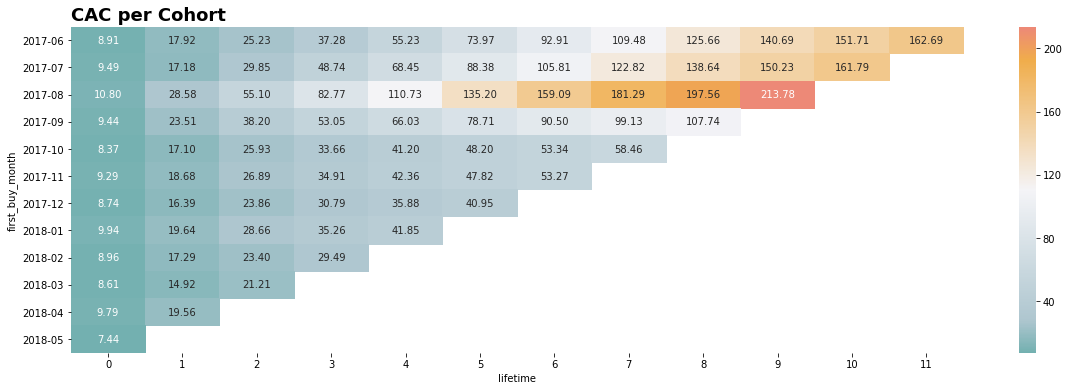

In [169]:
plt.figure(figsize=(20,6))
sns.heatmap(cohort_order.pivot_table(index=cohort_order['first_buy_month'].dt.strftime('%Y-%m'),
                         columns='lifetime',
                         values='cac',
                         aggfunc='mean').cumsum(axis=1),
            annot=True, fmt='.2f', cmap=cm)

plt.title('CAC per Cohort', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

The heat shows the CAC over period of one year evaluated every month. On the 12th month source #3 absorbed USD141321.63 and only gained USD46766 to get the CAC of USD38.4 per user. Compare this to source #1 where it attracted 248662 users at the same period for only USD20833.27.

In [170]:
cac_source

,costs,n_user,cac
source_id,,,
1,20833.27,34121,0.610570
2,42806.04,47626,0.898796
3,141321.63,85610,1.650761
4,61073.60,101794,0.599972
5,51757.10,66905,0.773591
9,5517.49,13277,0.415568
10,5822.49,10025,0.580797


**How worthwhile where the investments? (ROI)**

To find the ROI, or rather, ROMI (Return On Marketing Investment), we merge two dataframes that have `cac` and `ltv` columns which are `cac` and `source` dataframes,

Calculating ROMI,

In [175]:
cohort_order.head()

,first_buy_month,buy_month,revenue,n_user,gp,lifetime,ltv,costs,cac
0,2017-06-01,2017-06-01,9557.49,2023,4778.745,0,2.362207,18015.00,8.905091
1,2017-06-01,2017-07-01,981.82,2023,490.910,1,0.242664,18240.59,9.016604
2,2017-07-01,2017-07-01,11557.65,1923,5778.825,0,3.005109,18240.59,9.485486
3,2017-06-01,2017-08-01,885.34,2023,442.670,2,0.218819,14790.54,7.311191
4,2017-07-01,2017-08-01,644.61,1923,322.305,1,0.167605,14790.54,7.691388


In [176]:
cohort_order['romi'] = cohort_order['ltv']/cohort_order['cac']
cohort_order.head()

,first_buy_month,buy_month,revenue,n_user,gp,lifetime,ltv,costs,cac,romi
0,2017-06-01,2017-06-01,9557.49,2023,4778.745,0,2.362207,18015.00,8.905091,0.265265
1,2017-06-01,2017-07-01,981.82,2023,490.910,1,0.242664,18240.59,9.016604,0.026913
2,2017-07-01,2017-07-01,11557.65,1923,5778.825,0,3.005109,18240.59,9.485486,0.316811
3,2017-06-01,2017-08-01,885.34,2023,442.670,2,0.218819,14790.54,7.311191,0.029929
4,2017-07-01,2017-08-01,644.61,1923,322.305,1,0.167605,14790.54,7.691388,0.021791


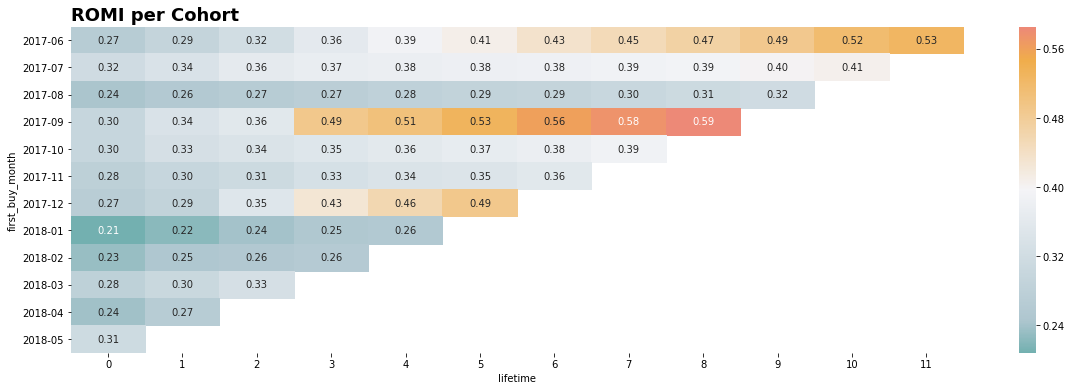

In [177]:
plt.figure(figsize=(20,6))
sns.heatmap(cohort_order.pivot_table(index=cohort_order['first_buy_month'].dt.strftime('%Y-%m'),
                         columns='lifetime',
                         values='romi',
                         aggfunc='mean').cumsum(axis=1),
            annot=True, fmt='.2f', cmap=cm)

plt.title('ROMI per Cohort', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

From the ROMI heatmap we can conclude that no cohort that indicates a good investment, since most ROMI are below 1.

In [178]:
romi_source = pd.merge(cac_source, ltv_source, on='source_id')
romi_source

,source_id,costs,n_user,cac,buy_month,revenue,gp,n_size,ltv
0,1,20833.27,34121,0.610570,2017-06-01,51524.95,25762.475,7138,3.609201
1,1,20833.27,34121,0.610570,2017-07-01,111710.63,55855.315,7138,7.825065
2,1,20833.27,34121,0.610570,2017-08-01,86273.21,43136.605,7138,6.043234
3,1,20833.27,34121,0.610570,2017-09-01,279308.11,139654.055,7138,19.564872
4,1,20833.27,34121,0.610570,2017-10-01,187071.49,93535.745,7138,13.103915
...,...,...,...,...,...,...,...,...,...
80,10,5822.49,10025,0.580797,2018-01-01,540.72,270.360,1773,0.152487
81,10,5822.49,10025,0.580797,2018-02-01,1701.84,850.920,1773,0.479932
82,10,5822.49,10025,0.580797,2018-03-01,2273.74,1136.870,1773,0.641213
83,10,5822.49,10025,0.580797,2018-04-01,913.28,456.640,1773,0.257552


In [179]:
romi_source['romi'] = romi_source['ltv']/romi_source['cac']
romi_source

,source_id,costs,n_user,cac,buy_month,revenue,gp,n_size,ltv,romi
0,1,20833.27,34121,0.610570,2017-06-01,51524.95,25762.475,7138,3.609201,5.911196
1,1,20833.27,34121,0.610570,2017-07-01,111710.63,55855.315,7138,7.825065,12.815993
2,1,20833.27,34121,0.610570,2017-08-01,86273.21,43136.605,7138,6.043234,9.897687
3,1,20833.27,34121,0.610570,2017-09-01,279308.11,139654.055,7138,19.564872,32.043601
4,1,20833.27,34121,0.610570,2017-10-01,187071.49,93535.745,7138,13.103915,21.461762
...,...,...,...,...,...,...,...,...,...,...
80,10,5822.49,10025,0.580797,2018-01-01,540.72,270.360,1773,0.152487,0.262548
81,10,5822.49,10025,0.580797,2018-02-01,1701.84,850.920,1773,0.479932,0.826334
82,10,5822.49,10025,0.580797,2018-03-01,2273.74,1136.870,1773,0.641213,1.104022
83,10,5822.49,10025,0.580797,2018-04-01,913.28,456.640,1773,0.257552,0.443446


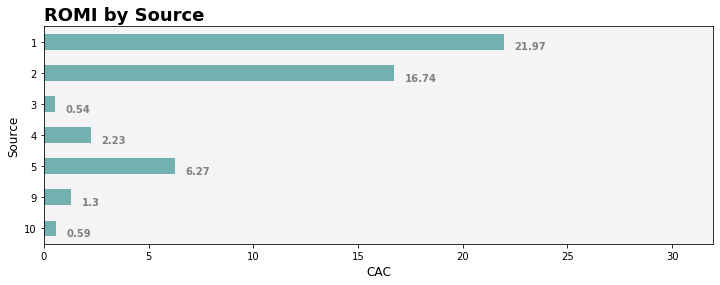

In [180]:
romi_source_ = romi_source.groupby('source_id').mean()

# Plotting the graphs
f, ax = plt.subplots(figsize=(12,4), )
romi_source_['romi'].plot(kind='barh', color='#73B0B0', ax=ax)

# Showing bar values
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()+0.5, i.get_y()+ i.get_height(),
             str(round(( i.get_width()), 2)),
             fontsize = 10, fontweight = 'bold', 
             color='grey')

# Inverting the y-axis so the scale has ascending values
ax.invert_yaxis()

# Setting the facecolor
ax.set_facecolor('#F4F4F7')

# Setting x-axis range 
ax.axes.set_xlim(0, max(romi_source_.romi)+10)

# Naming the axis labels
ax.set_xlabel('CAC', fontname='tahoma', fontsize=12)
ax.set_ylabel('Source', fontname='tahoma', fontsize=12)

# Setting the plot titlwe
plt.title('ROMI by Source', loc='left', fontsize=18, fontname='tahoma', fontweight='bold')
plt.show()

### Conclusion<a class="anchor" id="Conclusion_3"></a>

In this step, we found the following findings:

* Regarding user's visit:
    * On average, there are 908 unique visits per day, 5716 per week, and 23228 per month. 
    * On the other hand, we can expect 987 sessions per day.
    * There was a significant increase in a visit during the end-of-year holiday, particularly on Black Friday
    * Most customers came to the site through ad source #3, #4, #5, and most of them using the desktop-based web interface.
    * On average, users spends 10.7 minutes on the site
    * There was a sudden drop in session length and daily visit indicating a problem on our end, possibly a server problem
    * The cohorts formed at the end of the year, especially Dec-17, have the best user retention rate.        
* Regarding sales:
    * Among all visitors, only 16% converted into buying customers. Mor than half of them converted at 0 days, and the highest cohort that has 0d conversion was the Oct-17 cohort
    * In terms of as source,  source #3 and #4 had the highest 0d conversion
    * The Jun-17 cohort consistently produces a high volume of orders even until its 9th month. Another cohort that potentially able to match them is the Mar-18 cohort. 
    * Ad source #1 and #2 produced large orders when compares to other sources.
    * The cohort that has the highest LTV is the Jun-17 followed by Sep-17 cohort, while source #1 and source #2 also generated high LTV score with 320 and 360, respectively
* Regarding marketing:
    * The overall marketing cost in a year is USD329131. Most of them are used by ad source #3.
    * By evaluating the LTVs and CACs, we found out that ad source #1 and #2 are the most profitable, with ROMI of USD339 and USD1818, respectively. 

## Step 4: General Conclusion<a class="anchor" id="step_4"></a>

We have learned from the analyses done in the previous step that the most profiting ad source is **source #1**. The source generated the highest return of investment (ROMI), USD339.94, with the lowest Customer Acquisition Costs (CAC), USD0.09 per user, and produced large volume orders. **Ad source #2** also has a similar performance as #1, although on a smaller scale. On the other hand, source #3 has not been performing very well. Source #3 generated USD3.2 per user CAC, with the LTV only USD22, far below source #1 and #2.

No cohorts that have ROMI greater than 1 which indicate we haven't generated enough revenue to cover the marketing costs. Only two cohorts, Jun-17 and Sep-17 have the highest ROMI 0.53 and 0.59 respectively.

**Hence, we recommend that marketing experts focus on ad sources #1 and #2 to increase revenue. It would be advisable to reallocate the marketing budget from source #3 to allow source v #1 to attract more customers.**

We would also like to suggest that the best time to launch the marketing campaign is from October to March, where user visits peaked. 

Black Friday is a unique date. In many of our metrics, the value around and on this day increased almost three times. So it is worthwhile to give extra attention to attract more users on this day.

